# **"The Impact of Economic & ESG Multi-Factors on Global Health Outcomes"**
### **- Course:** CIS 545 Big Data Analytics
### **- Team:** Simon Imbot, Daniel Kim, Charles Fu
### **- Instructor:** Professor Zachary Ives, PhD
### **- Advisor:** Mr. Vaibhav Sahu, TA


## 0. Team Introduction

In [1]:
import os
import matplotlib.pyplot as plt
from google.colab import drive
from IPython.display import Image

drive.mount('/content/drive')
os.chdir('/content/')

#img = plt.imread('Team Intro.png')
#plt.axis("off")
#plt.imshow(img)
#plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **0.1 Project Initiative Introduction**
- **This project intends to examine the impact of economic, social, environmental, and governance factors on global health outcomes. This will be done by analyzing how GDP, poverty, infant mortality, wealth inequality, CPI, inflation rate, and other variables influence health outcomes worldwide.**

- **The objective of the project is to identify which factors significantly affect global health outcomes versus which factors play a less important role. By understanding these relationships, our project intends to provide insights that can inform policy decisions, interventions, and strategies aimed at improving public health on a global scale. On top of that, we would also like to develop predictive models to forecast health outcomes based on these factors.**

- **To perform the goals stated above, we are currently considering multiple regression models to analyze the relationship between independent variables in economic, social, environmental, governance on health outcomes as well as more machine learning models for predictive analysis to dissect feature importance.**

In [2]:
Image(url='http://greenfinance.hk/wp-content/uploads/2023/12/esg_intro_3elements_en.png', width=500)

##1. Let's begin with libarary imports!

In [3]:
!pip install sqlalchemy==1.4.46
!pip install pandasql

In [4]:
import json
import glob
import pandas as pd
import datetime as dt
import re
import os
import seaborn as sns
import numpy as np
from matplotlib import cm
from google.colab import drive
from sklearn.model_selection import train_test_split
from collections import Counter
import seaborn as sns
import pandasql as ps
from sklearn.impute import KNNImputer
import sklearn

## 1.1 Data Pre-Processing & Modeling





In [5]:
df_world_bank = pd.read_csv("/content/drive/MyDrive/CIS545_Project/world_bank_long_data_nulls.csv", header=0, low_memory=False)
df_health = pd.read_csv("/content/drive/MyDrive/CIS545_Project/data_3.csv", header=0, low_memory=False)

### 1.1.1 Initial Datasets

We will start with 2 datasets:


1.   **df_world_bank**: Time series data that holds information on the social, economic, and environmental for countries. We obtained this dataset from the World Bank open DataBank for World Development Indicators. From their website, they describe, "World Development Indicators (WDI) is the primary World Bank collection of development indicators, compiled from officially recognized international sources. It presents the most current and accurate global development data available, and includes national, regional and global estimates." More information can be found at https://databank.worldbank.org/source/world-development-indicators#.
2.   **df_health**: Time series data that holds various health outcomes for countries. This dataset was provided by our course TAs.



In [6]:
df_world_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79644 entries, 0 to 79643
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   79641 non-null  object 
 1   Country Code   79639 non-null  object 
 2   Series Name    79639 non-null  object 
 3   Series Code    79639 non-null  object 
 4   1995 [YR1995]  35837 non-null  float64
 5   1996 [YR1996]  36867 non-null  float64
 6   1997 [YR1997]  34125 non-null  float64
 7   1998 [YR1998]  37986 non-null  float64
 8   1999 [YR1999]  37468 non-null  float64
 9   2000 [YR2000]  43603 non-null  float64
 10  2001 [YR2001]  39622 non-null  float64
 11  2002 [YR2002]  42903 non-null  float64
 12  2003 [YR2003]  42440 non-null  float64
 13  2004 [YR2004]  43878 non-null  float64
 14  2005 [YR2005]  44966 non-null  float64
 15  2006 [YR2006]  44685 non-null  float64
 16  2007 [YR2007]  44616 non-null  float64
 17  2008 [YR2008]  45694 non-null  float64
 18  2009 [

In [7]:
df_world_bank.head(40)

,Country Name,Country Code,Series Name,Series Code,1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],...,2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014]
0,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,6.700000,...,1.250000e+01,1.390000e+01,1.530000e+01,1.680000e+01,1.820000e+01,1.970000e+01,2.130000e+01,2.270000e+01,2.430000e+01,2.570000e+01
1,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,1.100000,...,2.700000e+00,3.300000e+00,3.800000e+00,4.400000e+00,5.200000e+00,6.000000e+00,7.000000e+00,7.900000e+00,8.900000e+00,9.900000e+00
2,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,30.500000,...,5.170000e+01,5.570000e+01,5.960000e+01,6.285000e+01,6.630000e+01,6.905000e+01,7.160000e+01,7.400000e+01,7.580000e+01,7.760000e+01
3,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,4.446891,...,2.866967e+01,3.354442e+01,3.844000e+01,4.240000e+01,4.827901e+01,4.270000e+01,4.322202e+01,6.910000e+01,6.804088e+01,8.950000e+01
4,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.535564e+01,1.926482e+01,2.503640e+01,2.795425e+01,3.669450e+01,3.021880e+01,2.957288e+01,6.084916e+01,6.023920e+01,8.650051e+01
5,Afghanistan,AFG,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,73.444473,...,7.400000e+01,8.160209e+01,8.302802e+01,8.990000e+01,8.593159e+01,8.280000e+01,8.656778e+01,9.500000e+01,9.224872e+01,9.870000e+01
6,Afghanistan,AFG,"Adjusted net enrollment rate, primary (% of pr...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,AFG,Adolescents out of school (% of lower secondar...,SE.SEC.UNER.LO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,AFG,Agricultural methane emissions (% of total),EN.ATM.METH.AG.ZS,68.380744,70.896274,72.735849,74.054054,75.737152,72.804533,...,7.283633e+01,5.809268e+01,4.861878e+01,4.420388e+01,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,AFG,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,6246.162500,7039.072500,7710.342500,8219.445000,8988.017500,7712.140000,...,8.496705e+03,8.651660e+03,8.796810e+03,9.801983e+03,9.993155e+03,1.151452e+04,1.153325e+04,1.137928e+04,1.128475e+04,1.147620e+04


In [8]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89010 entries, 0 to 89009
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    89010 non-null  object 
 1   Country Code    89010 non-null  object 
 2   Indicator Name  89010 non-null  object 
 3   Indicator Code  89010 non-null  object 
 4   1960            35482 non-null  float64
 5   1961            35325 non-null  float64
 6   1962            35889 non-null  float64
 7   1963            35452 non-null  float64
 8   1964            35483 non-null  float64
 9   1965            35603 non-null  float64
 10  1966            35538 non-null  float64
 11  1967            36022 non-null  float64
 12  1968            35577 non-null  float64
 13  1969            35630 non-null  float64
 14  1970            36910 non-null  float64
 15  1971            37578 non-null  float64
 16  1972            38015 non-null  float64
 17  1973            37542 non-null 

In [9]:
df_health.head(40)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
0,Arab World,ARB,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,133.555013,134.159119,134.857912,134.504576,134.105211,133.569626,...,49.999851,49.887046,49.781207,49.672975,49.536047,49.383745,48.796558,48.196418,NaN,NaN
3,Arab World,ARB,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,Adults (ages 15+) living with HIV,SH.DYN.AIDS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arab World,ARB,Adults (ages 15+) newly infected with HIV,SH.HIV.INCD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Age at first marriage, female",SP.DYN.SMAM.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Arab World,ARB,"Age at first marriage, male",SP.DYN.SMAM.MA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,87.799235,89.221714,90.502403,91.603014,92.414916,92.868163,...,64.630067,63.602627,62.738022,62.053505,61.794943,61.681904,61.678686,61.719792,61.754194,NaN


#### Data Cleaning and Wrangling Step-by-step

In [10]:
from IPython.display import Image
Image(url='https://media1.tenor.com/m/LX1reyWcd8EAAAAC/oopsies-ohno.gif')

Oh boy, there's a lot of transforming that we need to do.

This is an unordered list of tasks that will need to be completed:


*   A function needs to be applied to all of the year column headers in the world_bank_df to remove the "[YRXXXX]" info.
*   The years in both dataframes now need to be converted to datetime objects.
*   Based off of the numbers of null values in in the health_df dataframe, we should limit our exploration to the date range 1995-2014.
*   We can drop all of the regional and aggregate statistics in the health_df.
*   We can drop the series ID and indicator ID columns in the world_bank_df and health_df respectively.
*   Country names and indicator/series need to be converted from "object" to "string".
*   Need to select which indicators should be features and which should be our targets, this boils down to the hypotheses we want to explore. I think we should do this for several targets.
*   It seems like all of our data is numerical, so one-hot encoding shouldn't be necessary. Nevertheless, we should select a target to convert to categorical data so we can perform some classification tasks.
*   Currently all of our columns are years, and the features are all rows. We need to transofmr it to be Year as one column and each feature as one column.





### 1.1.2 Lets start by dropping all the regional statistics from our health_df

In [11]:
# get a list of the unique country names
health_country_set = df_health["Country Name"].unique()

# Afghanistan is the first country listed alphabetically, lets get its index
i, = np.where(health_country_set == "Afghanistan")
print(i)

# Lets slice the list and obtain a list of all the regional and aggregate values that we want to remove
health_regions_remove = health_country_set[:41]
health_regions_keep = health_country_set[41:]
print(len(health_regions_keep))

[41]
217


### Here, we parlay the SQL query to fetch desired data.

In [12]:
#Convert the regions we want to remove into a comma-separated string, so it can be processed by a SQL query
health_regions_remove_str = ', '.join([f'"{country}"' for country in health_regions_remove])


country_removal_query = f'''
                        SELECT *
                        FROM df_health
                        WHERE "Country Name" NOT IN ({health_regions_remove_str})
'''


df_health_countries = ps.sqldf(country_removal_query, locals())
# df_health_countries.head(40)

In [13]:
# error checking
print(len(df_health_countries["Country Name"].unique()))
if (len(health_regions_keep) != len(df_health_countries["Country Name"].unique())):
  print("ERROR! Number of Countries is Incorrect!")
else:
  print("Looks good!")

217
Looks good!


###1.1.3 Now let's rename the headers and clean up the years so we can concatenate the tables.

In [14]:
df_world_bank.rename(columns={"Series Name" : "Indicator Name", "Series Code" : "Indicator Code"}, inplace=True)
for column in df_world_bank.columns:
  if column[0].isdigit():
    df_world_bank.rename(columns={column : column[:4]},inplace=True)


In [15]:
df_world_bank.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1995,1996,1997,1998,1999,2000,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,6.700000,...,12.500000,13.900000,15.300000,16.800000,18.200000,19.700000,21.300000,22.700000,24.300000,25.700000
1,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,1.100000,...,2.700000,3.300000,3.800000,4.400000,5.200000,6.000000,7.000000,7.900000,8.900000,9.900000
2,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,30.500000,...,51.700000,55.700000,59.600000,62.850000,66.300000,69.050000,71.600000,74.000000,75.800000,77.600000
3,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,4.446891,...,28.669672,33.544418,38.440002,42.400000,48.279007,42.700000,43.222019,69.100000,68.040878,89.500000
4,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,15.355643,19.264821,25.036398,27.954251,36.694504,30.218802,29.572881,60.849157,60.239198,86.500512


In [16]:
df_concatenated = pd.concat([df_health_countries, df_world_bank])

In [17]:
df_concatenated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154509 entries, 0 to 79643
Data columns (total 61 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    154506 non-null  object 
 1   Country Code    154504 non-null  object 
 2   Indicator Name  154504 non-null  object 
 3   Indicator Code  154504 non-null  object 
 4   1960            32325 non-null   float64
 5   1961            32071 non-null   float64
 6   1962            32530 non-null   float64
 7   1963            32173 non-null   float64
 8   1964            32198 non-null   float64
 9   1965            32308 non-null   float64
 10  1966            32238 non-null   float64
 11  1967            32639 non-null   float64
 12  1968            32271 non-null   float64
 13  1969            32310 non-null   float64
 14  1970            33186 non-null   float64
 15  1971            33864 non-null   float64
 16  1972            34202 non-null   float64
 17  1973            

###1.1.4 Looks good so far, now let's remove everything before 1995.
We'll also remove the country and indicator codes, and convert the country and indicator names to strings

In [18]:
for column in df_concatenated.columns:
  if column[0].isdigit() and (int(column) < 1995 or int(column) > 2014):
    df_concatenated.drop(columns=[column], inplace=True, axis=1)
df_concatenated.drop(columns = ["Country Code", "Indicator Code", "Unnamed: 60"], inplace=True, axis=1)
df_concatenated['Country Name'] = df_concatenated['Country Name'].astype("string")
df_concatenated['Indicator Name'] = df_concatenated['Indicator Name'].astype("string")


In [19]:
df_concatenated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154509 entries, 0 to 79643
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    154506 non-null  string 
 1   Indicator Name  154504 non-null  string 
 2   1995            81350 non-null   float64
 3   1996            82501 non-null   float64
 4   1997            79850 non-null   float64
 5   1998            83570 non-null   float64
 6   1999            84047 non-null   float64
 7   2000            93462 non-null   float64
 8   2001            86638 non-null   float64
 9   2002            90445 non-null   float64
 10  2003            89537 non-null   float64
 11  2004            91371 non-null   float64
 12  2005            93200 non-null   float64
 13  2006            93147 non-null   float64
 14  2007            92878 non-null   float64
 15  2008            93610 non-null   float64
 16  2009            92809 non-null   float64
 17  2010            

In [20]:
#drop rows where all values are null
df_concatenated.dropna(how="all",axis=0,inplace=True)
df_concatenated

,Country Name,Indicator Name,1995,1996,1997,1998,1999,2000,2001,2002,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,% of females ages 15-49 having comprehensive c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.500000e+00,NaN,NaN,NaN
1,Afghanistan,% of males ages 15-49 having comprehensive cor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,"Adolescent fertility rate (births per 1,000 wo...",1.647116e+02,1.649768e+02,1.652420e+02,1.614432e+02,1.576444e+02,1.538456e+02,1.500468e+02,1.462480e+02,...,1.289332e+02,1.231616e+02,1.173900e+02,1.114708e+02,1.055516e+02,9.963240e+01,9.371320e+01,8.779400e+01,8.226380e+01,7.673360e+01
3,Afghanistan,Adults (ages 15+) and children (0-14 years) li...,1.100000e+03,1.300000e+03,1.400000e+03,1.600000e+03,1.700000e+03,1.900000e+03,2.100000e+03,2.300000e+03,...,3.100000e+03,3.300000e+03,3.500000e+03,3.800000e+03,4.200000e+03,4.500000e+03,4.900000e+03,5.300000e+03,5.900000e+03,6.400000e+03
4,Afghanistan,Adults (ages 15+) and children (ages 0-14) new...,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,...,5.000000e+02,5.000000e+02,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79636,Zimbabwe,Urban population,3.488629e+06,3.591770e+06,3.696644e+06,3.803916e+06,3.907086e+06,3.995150e+06,4.069981e+06,4.144889e+06,...,4.169863e+06,4.183242e+06,4.201195e+06,4.211896e+06,4.232267e+06,4.262290e+06,4.300463e+06,4.355539e+06,4.426387e+06,4.503674e+06
79637,Zimbabwe,Urban population (% of total population),3.173200e+01,3.213200e+01,3.253400e+01,3.293900e+01,3.334700e+01,3.375800e+01,3.417000e+01,3.458500e+01,...,3.411000e+01,3.392600e+01,3.374300e+01,3.356000e+01,3.337800e+01,3.319600e+01,3.301500e+01,3.283400e+01,3.265400e+01,3.250400e+01
79638,Zimbabwe,Urban population growth (annual %),2.498661e+00,2.913629e+00,2.878026e+00,2.860568e+00,2.676077e+00,2.228930e+00,1.855721e+00,1.823768e+00,...,-1.414815e-02,3.203362e-01,4.282465e-01,2.543894e-01,4.824881e-01,7.068791e-01,8.916117e-01,1.272568e+00,1.613531e+00,1.730983e+00
79642,Data from database: World Development Indicators,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#remove last two lines of metadata
df_concatenated.drop(df_concatenated.index[-2:],inplace=True)
df_concatenated

,Country Name,Indicator Name,1995,1996,1997,1998,1999,2000,2001,2002,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,% of females ages 15-49 having comprehensive c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.500000e+00,NaN,NaN,NaN
1,Afghanistan,% of males ages 15-49 having comprehensive cor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,"Adolescent fertility rate (births per 1,000 wo...",1.647116e+02,1.649768e+02,1.652420e+02,1.614432e+02,1.576444e+02,1.538456e+02,1.500468e+02,1.462480e+02,...,1.289332e+02,1.231616e+02,1.173900e+02,1.114708e+02,1.055516e+02,9.963240e+01,9.371320e+01,8.779400e+01,8.226380e+01,7.673360e+01
3,Afghanistan,Adults (ages 15+) and children (0-14 years) li...,1.100000e+03,1.300000e+03,1.400000e+03,1.600000e+03,1.700000e+03,1.900000e+03,2.100000e+03,2.300000e+03,...,3.100000e+03,3.300000e+03,3.500000e+03,3.800000e+03,4.200000e+03,4.500000e+03,4.900000e+03,5.300000e+03,5.900000e+03,6.400000e+03
4,Afghanistan,Adults (ages 15+) and children (ages 0-14) new...,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,...,5.000000e+02,5.000000e+02,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79634,Zimbabwe,"Unemployment, youth total (% of total labor fo...",1.235400e+01,1.363500e+01,1.536800e+01,1.386600e+01,1.281500e+01,1.190200e+01,1.082300e+01,9.879000e+00,...,8.199000e+00,8.351000e+00,8.693000e+00,9.296000e+00,9.379000e+00,9.270000e+00,9.035000e+00,8.173000e+00,7.613000e+00,6.937000e+00
79635,Zimbabwe,"Unemployment, youth total (% of total labor fo...",NaN,NaN,1.653000e+01,NaN,1.403000e+01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.733000e+00,NaN,NaN,6.831000e+00
79636,Zimbabwe,Urban population,3.488629e+06,3.591770e+06,3.696644e+06,3.803916e+06,3.907086e+06,3.995150e+06,4.069981e+06,4.144889e+06,...,4.169863e+06,4.183242e+06,4.201195e+06,4.211896e+06,4.232267e+06,4.262290e+06,4.300463e+06,4.355539e+06,4.426387e+06,4.503674e+06
79637,Zimbabwe,Urban population (% of total population),3.173200e+01,3.213200e+01,3.253400e+01,3.293900e+01,3.334700e+01,3.375800e+01,3.417000e+01,3.458500e+01,...,3.411000e+01,3.392600e+01,3.374300e+01,3.356000e+01,3.337800e+01,3.319600e+01,3.301500e+01,3.283400e+01,3.265400e+01,3.250400e+01


###1.1.5 A lot of features also have too many null values to be relevant to our research.

1.   Pivot the table to get the features as columns
2.   Remove features that has over 15% missing values
3.   Remove any male/female specific features

In [22]:
df_pivot_for_removal = df_concatenated.melt(id_vars=['Country Name', 'Indicator Name'], var_name='Year', value_name='value')
df_pivot_for_removal['Year'] = df_pivot_for_removal['Year'].str.extract('(\d+)', expand=False).astype(int)

# Pivot the DataFrame to get the desired structure
df_pivot_for_removal_completed = df_pivot_for_removal.pivot_table(index=['Country Name', 'Year'], columns='Indicator Name', values='value').reset_index()
df_pivot_for_removal_completed

Indicator Name,Country Name,Year,% of females ages 15-49 having comprehensive c...,% of males ages 15-49 having comprehensive cor...,AIDS estimated deaths (UNAIDS estimates),ARI treatment (% of children under 5 taken to ...,Access to clean fuels and technologies for coo...,Access to clean fuels and technologies for coo...,Access to clean fuels and technologies for coo...,Access to electricity (% of population),...,Urban population (% of total population),Urban population (% of total),Urban population growth (annual %),Urban poverty headcount ratio at national pove...,Use of Intermittent Preventive Treatment of ma...,Use of any antimalarial drug (% of pregnant wo...,Use of insecticide-treated bed nets (% of unde...,Vitamin A supplementation coverage rate (% of ...,Wanted fertility rate (births per woman),Women's share of population ages 15+ living wi...
0,Afghanistan,1995,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,...,21.624,19.757,6.749686,NaN,NaN,NaN,NaN,NaN,NaN,25.350795
1,Afghanistan,1996,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,...,21.714,20.055,5.078628,NaN,NaN,NaN,NaN,NaN,NaN,25.832656
2,Afghanistan,1997,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,...,21.805,20.356,4.464562,NaN,NaN,NaN,NaN,NaN,NaN,26.277898
3,Afghanistan,1998,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,...,21.895,20.661,4.197265,NaN,NaN,NaN,NaN,NaN,NaN,26.640159
4,Afghanistan,1999,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,...,21.986,20.970,4.391977,NaN,NaN,NaN,NaN,78.0,NaN,26.941748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4455,Zimbabwe,2010,NaN,NaN,52000.0,NaN,30.4,4.7,81.5,38.886208,...,33.196,33.196,0.993255,NaN,NaN,NaN,NaN,49.0,NaN,58.825943
4456,Zimbabwe,2011,55.9,53.0,43000.0,48.0,30.3,4.9,81.0,36.900000,...,33.015,33.015,1.170346,46.5,7.3,25.4,9.7,47.0,3.5,58.899308
4457,Zimbabwe,2012,NaN,NaN,37000.0,NaN,30.1,5.1,80.6,44.000000,...,32.834,32.834,1.436667,NaN,NaN,NaN,NaN,61.0,NaN,58.939080
4458,Zimbabwe,2013,NaN,NaN,35000.0,NaN,30.1,5.3,80.1,40.644161,...,32.654,32.654,1.660843,NaN,NaN,NaN,NaN,34.0,NaN,58.900126


In [23]:
df_feature_removal = df_pivot_for_removal_completed.columns[df_pivot_for_removal_completed.isnull().mean() < 0.15]
df_feature_removal_completed = []
#Remove features that are also gender based, since these will be highly correlated
for x in df_feature_removal:
  if 'male' not in x and 'female' not in x and 'Female' not in x and 'Male' not in x:
    df_feature_removal_completed.append(x)
df_feature_removal_completed = df_pivot_for_removal_completed[df_feature_removal_completed]
df_feature_removal

Index(['Country Name', 'Year', 'Access to electricity (% of population)',
       'Access to electricity, urban (% of urban population)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old', 'Age dependency ratio, young',
       'Age population, age 0, female, interpolated',
       'Age population, age 0, male, interpolated',
       ...
       'Secondary education, duration (years)',
       'Survival to age 65, female (% of cohort)',
       'Survival to age 65, male (% of cohort)',
       'Total greenhouse gas emissions (kt of CO2 equivalent)',
       'Tuberculosis case detection rate (all forms)',
       'Tuberculosis death rate (per 100,000 people)', 'Urban population',
       'Urban population (% of total population)',
       'Urban population (% of total)', 'Urban population growth (annual %)'],
      dtype='string', name='Indicator Name', length=216)

## 1.2 K-Nearest Neighbor Imputation Step

In [24]:
from IPython.display import Image
Image(url='https://www.brodrigues.co/img/kermit.png')

###1.2.1 Using KNN to impute values for the rest of the NULL values in our dataframes

In [25]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=6, weights="distance")
df_numerical = df_feature_removal_completed.drop(columns=["Country Name", "Year"])
df_imputed_subset = pd.DataFrame(imputer.fit_transform(df_numerical), columns=df_numerical.columns)
df_imputed_subset

Indicator Name,Access to electricity (% of population),"Access to electricity, urban (% of urban popul...","Adolescent fertility rate (births per 1,000 wo...",Age dependency ratio (% of working-age populat...,"Age dependency ratio, old","Age dependency ratio, young",Agricultural methane emissions (thousand metri...,Agricultural nitrous oxide emissions (thousand...,"Birth rate, crude (per 1,000 people)",CO2 emissions (kt),...,Rural population (% of total population),Rural population growth (annual %),"Secondary education, duration (years)",Total greenhouse gas emissions (kt of CO2 equi...,Tuberculosis case detection rate (all forms),"Tuberculosis death rate (per 100,000 people)",Urban population,Urban population (% of total population),Urban population (% of total),Urban population growth (annual %)
0,23.654032,64.693435,164.7116,100.476266,4.654247,95.822019,6246.1625,2704.8566,48.978,1457.69,...,79.3095,5.548078,6.0,12181.31843,51.630412,68.0,3432086.5,21.624,19.757,6.749686
1,31.263206,74.638488,164.9768,101.231924,4.662978,96.568946,7039.0725,2938.3992,49.039,1407.30,...,79.1155,3.878952,6.0,13231.10066,46.868548,71.0,3610250.5,21.714,20.055,5.078628
2,32.154734,76.438164,165.2420,101.976746,4.651200,97.325547,7710.3425,3242.3890,49.036,1344.10,...,78.9195,3.263824,6.0,14216.88009,3.800000,73.0,3774940.0,21.805,20.356,4.464562
3,30.623115,77.715360,161.4432,102.539894,4.624247,97.915647,8219.4450,3532.5218,48.930,1318.00,...,78.7220,2.998292,6.0,15063.73502,8.800000,74.0,3936864.0,21.895,20.661,4.197265
4,27.141158,76.133087,157.6444,102.925568,4.588172,98.337396,8988.0175,3803.2250,48.699,1122.00,...,78.5220,3.188932,6.0,15980.73034,9.200000,73.0,4113743.5,21.986,20.970,4.391977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4455,38.886208,85.310738,115.0006,80.985702,5.813059,75.172643,7280.0350,5588.0662,36.267,9518.00,...,66.8040,1.812825,6.0,28228.84889,76.000000,15.0,4450532.5,33.196,33.196,0.993255
4456,36.900000,83.200000,114.1658,80.740494,5.728887,75.011607,7562.0000,5695.1972,36.264,11357.60,...,66.9850,1.987650,6.0,30638.58212,70.000000,16.0,4503473.5,33.015,33.015,1.170346
4457,44.000000,85.422844,113.3310,80.579870,5.622586,74.957283,7250.2000,5221.0196,36.077,11954.90,...,67.1660,2.256264,6.0,30655.64175,69.000000,15.0,4568984.5,32.834,32.834,1.436667
4458,40.644161,85.462746,111.8664,80.499816,5.510929,74.988887,7001.0400,4986.8214,35.715,12216.80,...,67.3460,2.478203,6.0,30631.32079,73.000000,13.0,4645605.0,32.654,32.654,1.660843


In [26]:
# Adds back removed country name and indicator
df_imputed_full = pd.concat([df_feature_removal_completed[["Country Name", "Year"]], df_imputed_subset], axis=1)
df_imputed_full

Indicator Name,Country Name,Year,Access to electricity (% of population),"Access to electricity, urban (% of urban popul...","Adolescent fertility rate (births per 1,000 wo...",Age dependency ratio (% of working-age populat...,"Age dependency ratio, old","Age dependency ratio, young",Agricultural methane emissions (thousand metri...,Agricultural nitrous oxide emissions (thousand...,...,Rural population (% of total population),Rural population growth (annual %),"Secondary education, duration (years)",Total greenhouse gas emissions (kt of CO2 equi...,Tuberculosis case detection rate (all forms),"Tuberculosis death rate (per 100,000 people)",Urban population,Urban population (% of total population),Urban population (% of total),Urban population growth (annual %)
0,Afghanistan,1995,23.654032,64.693435,164.7116,100.476266,4.654247,95.822019,6246.1625,2704.8566,...,79.3095,5.548078,6.0,12181.31843,51.630412,68.0,3432086.5,21.624,19.757,6.749686
1,Afghanistan,1996,31.263206,74.638488,164.9768,101.231924,4.662978,96.568946,7039.0725,2938.3992,...,79.1155,3.878952,6.0,13231.10066,46.868548,71.0,3610250.5,21.714,20.055,5.078628
2,Afghanistan,1997,32.154734,76.438164,165.2420,101.976746,4.651200,97.325547,7710.3425,3242.3890,...,78.9195,3.263824,6.0,14216.88009,3.800000,73.0,3774940.0,21.805,20.356,4.464562
3,Afghanistan,1998,30.623115,77.715360,161.4432,102.539894,4.624247,97.915647,8219.4450,3532.5218,...,78.7220,2.998292,6.0,15063.73502,8.800000,74.0,3936864.0,21.895,20.661,4.197265
4,Afghanistan,1999,27.141158,76.133087,157.6444,102.925568,4.588172,98.337396,8988.0175,3803.2250,...,78.5220,3.188932,6.0,15980.73034,9.200000,73.0,4113743.5,21.986,20.970,4.391977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4455,Zimbabwe,2010,38.886208,85.310738,115.0006,80.985702,5.813059,75.172643,7280.0350,5588.0662,...,66.8040,1.812825,6.0,28228.84889,76.000000,15.0,4450532.5,33.196,33.196,0.993255
4456,Zimbabwe,2011,36.900000,83.200000,114.1658,80.740494,5.728887,75.011607,7562.0000,5695.1972,...,66.9850,1.987650,6.0,30638.58212,70.000000,16.0,4503473.5,33.015,33.015,1.170346
4457,Zimbabwe,2012,44.000000,85.422844,113.3310,80.579870,5.622586,74.957283,7250.2000,5221.0196,...,67.1660,2.256264,6.0,30655.64175,69.000000,15.0,4568984.5,32.834,32.834,1.436667
4458,Zimbabwe,2013,40.644161,85.462746,111.8664,80.499816,5.510929,74.988887,7001.0400,4986.8214,...,67.3460,2.478203,6.0,30631.32079,73.000000,13.0,4645605.0,32.654,32.654,1.660843


In [27]:
df_imputed_full.columns

Index(['Country Name', 'Year', 'Access to electricity (% of population)',
       'Access to electricity, urban (% of urban population)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old', 'Age dependency ratio, young',
       'Agricultural methane emissions (thousand metric tons of CO2 equivalent)',
       'Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
       'Birth rate, crude (per 1,000 people)', 'CO2 emissions (kt)',
       'CO2 emissions (metric tons per capita)',
       'CO2 emissions from gaseous fuel consumption (kt)',
       'CO2 emissions from liquid fuel consumption (kt)',
       'CO2 emissions from solid fuel consumption (kt)',
       'Death rate, crude (per 1,000 people)',
       'Fertility rate, total (births per woman)', 'GDP (constant 2015 US$)',
       'GDP (current US$)', 'GDP per capita (constant 2015 US$)',
       'GD

In [28]:
df_final = df_imputed_full
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4460 entries, 0 to 4459
Data columns (total 74 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Country Name                                                                       4460 non-null   string 
 1   Year                                                                               4460 non-null   int64  
 2   Access to electricity (% of population)                                            4460 non-null   float64
 3   Access to electricity, urban (% of urban population)                               4460 non-null   float64
 4   Adolescent fertility rate (births per 1,000 women ages 15-19)                      4460 non-null   float64
 5   Age dependency ratio (% of working-age population)                                 4460 non-null   float

In [29]:
df_final

Indicator Name,Country Name,Year,Access to electricity (% of population),"Access to electricity, urban (% of urban popul...","Adolescent fertility rate (births per 1,000 wo...",Age dependency ratio (% of working-age populat...,"Age dependency ratio, old","Age dependency ratio, young",Agricultural methane emissions (thousand metri...,Agricultural nitrous oxide emissions (thousand...,...,Rural population (% of total population),Rural population growth (annual %),"Secondary education, duration (years)",Total greenhouse gas emissions (kt of CO2 equi...,Tuberculosis case detection rate (all forms),"Tuberculosis death rate (per 100,000 people)",Urban population,Urban population (% of total population),Urban population (% of total),Urban population growth (annual %)
0,Afghanistan,1995,23.654032,64.693435,164.7116,100.476266,4.654247,95.822019,6246.1625,2704.8566,...,79.3095,5.548078,6.0,12181.31843,51.630412,68.0,3432086.5,21.624,19.757,6.749686
1,Afghanistan,1996,31.263206,74.638488,164.9768,101.231924,4.662978,96.568946,7039.0725,2938.3992,...,79.1155,3.878952,6.0,13231.10066,46.868548,71.0,3610250.5,21.714,20.055,5.078628
2,Afghanistan,1997,32.154734,76.438164,165.2420,101.976746,4.651200,97.325547,7710.3425,3242.3890,...,78.9195,3.263824,6.0,14216.88009,3.800000,73.0,3774940.0,21.805,20.356,4.464562
3,Afghanistan,1998,30.623115,77.715360,161.4432,102.539894,4.624247,97.915647,8219.4450,3532.5218,...,78.7220,2.998292,6.0,15063.73502,8.800000,74.0,3936864.0,21.895,20.661,4.197265
4,Afghanistan,1999,27.141158,76.133087,157.6444,102.925568,4.588172,98.337396,8988.0175,3803.2250,...,78.5220,3.188932,6.0,15980.73034,9.200000,73.0,4113743.5,21.986,20.970,4.391977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4455,Zimbabwe,2010,38.886208,85.310738,115.0006,80.985702,5.813059,75.172643,7280.0350,5588.0662,...,66.8040,1.812825,6.0,28228.84889,76.000000,15.0,4450532.5,33.196,33.196,0.993255
4456,Zimbabwe,2011,36.900000,83.200000,114.1658,80.740494,5.728887,75.011607,7562.0000,5695.1972,...,66.9850,1.987650,6.0,30638.58212,70.000000,16.0,4503473.5,33.015,33.015,1.170346
4457,Zimbabwe,2012,44.000000,85.422844,113.3310,80.579870,5.622586,74.957283,7250.2000,5221.0196,...,67.1660,2.256264,6.0,30655.64175,69.000000,15.0,4568984.5,32.834,32.834,1.436667
4458,Zimbabwe,2013,40.644161,85.462746,111.8664,80.499816,5.510929,74.988887,7001.0400,4986.8214,...,67.3460,2.478203,6.0,30631.32079,73.000000,13.0,4645605.0,32.654,32.654,1.660843


In [30]:
null_count = df_final.isnull().sum()
print("Total number of null values in the DataFrame:", null_count)

Total number of null values in the DataFrame: Indicator Name
Country Name                                         0
Year                                                 0
Access to electricity (% of population)              0
Access to electricity, urban (% of urban popul...    0
Adolescent fertility rate (births per 1,000 wo...    0
                                                    ..
Tuberculosis death rate (per 100,000 people)         0
Urban population                                     0
Urban population (% of total population)             0
Urban population (% of total)                        0
Urban population growth (annual %)                   0
Length: 74, dtype: int64


## 1.3 Exploratory Data Analysis Step

###1.3.1 Now, let's build a correlation matrix to visualize which features to examine more closely

In [31]:
df_final_corr = df_final
df_final_corr = df_final_corr.drop(labels=["Country Name", 'Year'], axis=1)
correlation_matrix = df_final_corr.corr()
correlation_matrix

Indicator Name,Access to electricity (% of population),"Access to electricity, urban (% of urban popul...","Adolescent fertility rate (births per 1,000 wo...",Age dependency ratio (% of working-age populat...,"Age dependency ratio, old","Age dependency ratio, young",Agricultural methane emissions (thousand metri...,Agricultural nitrous oxide emissions (thousand...,"Birth rate, crude (per 1,000 people)",CO2 emissions (kt),...,Rural population (% of total population),Rural population growth (annual %),"Secondary education, duration (years)",Total greenhouse gas emissions (kt of CO2 equi...,Tuberculosis case detection rate (all forms),"Tuberculosis death rate (per 100,000 people)",Urban population,Urban population (% of total population),Urban population (% of total),Urban population growth (annual %)
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Access to electricity (% of population),1.000000,0.900040,-0.641215,-0.705302,0.524096,-0.726580,0.008941,0.027910,-0.810379,0.111559,...,-0.636324,-0.246113,0.082269,0.104934,0.418605,-0.597384,0.076921,0.638416,0.632396,-0.519110
"Access to electricity, urban (% of urban popul...",0.900040,1.000000,-0.619465,-0.638385,0.428784,-0.644902,0.043217,0.043350,-0.736884,0.100997,...,-0.520215,-0.224113,0.068261,0.099206,0.381016,-0.525005,0.094820,0.522566,0.516225,-0.443523
"Adolescent fertility rate (births per 1,000 wo...",-0.641215,-0.619465,1.000000,0.811650,-0.538461,0.818063,-0.041998,-0.071904,0.764314,-0.146932,...,0.437228,0.203234,-0.191484,-0.139728,-0.373029,0.433807,-0.120387,-0.433848,-0.433961,0.403382
Age dependency ratio (% of working-age populat...,-0.705302,-0.638385,0.811650,1.000000,-0.533772,0.971664,-0.095188,-0.115490,0.830173,-0.172491,...,0.564151,0.212834,-0.141594,-0.171334,-0.359939,0.473254,-0.153414,-0.568328,-0.553231,0.430161
"Age dependency ratio, old",0.524096,0.428784,-0.538461,-0.533772,1.000000,-0.718525,-0.000284,0.044116,-0.703313,0.134147,...,-0.442816,-0.244846,0.236382,0.118002,0.333909,-0.384307,0.063136,0.440720,0.437363,-0.577979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Tuberculosis death rate (per 100,000 people)",-0.597384,-0.525005,0.433807,0.473254,-0.384307,0.496656,0.028666,-0.009193,0.542291,-0.078266,...,0.464635,0.143914,-0.056003,-0.067114,-0.510444,1.000000,-0.024422,-0.468336,-0.456447,0.323954
Urban population,0.076921,0.094820,-0.120387,-0.153414,0.063136,-0.143825,0.870239,0.950333,-0.106294,0.859370,...,-0.017489,-0.060144,0.026191,0.893399,-0.012849,-0.024422,1.000000,0.014565,0.020746,0.021103
Urban population (% of total population),0.638416,0.522566,-0.433848,-0.568328,0.440720,-0.590619,-0.041459,-0.008701,-0.584596,0.073470,...,-0.992998,-0.251115,0.010718,0.065349,0.389906,-0.468336,0.014565,1.000000,0.976410,-0.300519


<Axes: xlabel='Indicator Name', ylabel='Indicator Name'>

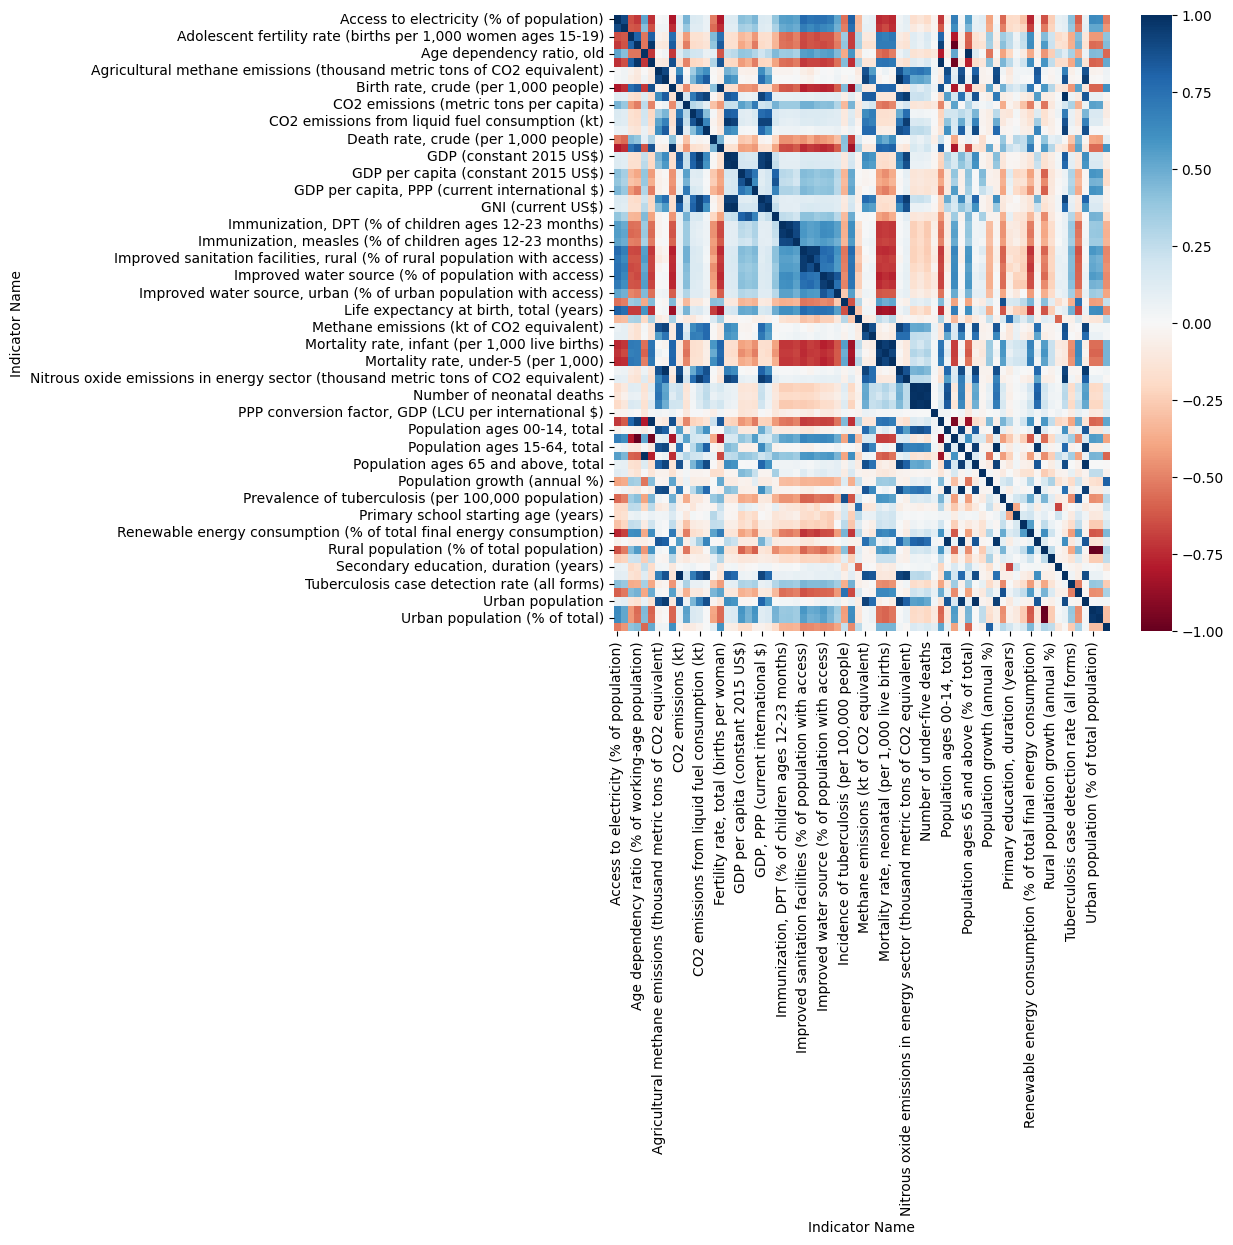

In [32]:
plt.subplots(figsize=(8, 8))
sns.heatmap(correlation_matrix, cmap="RdBu", vmin=-1, vmax=1)

###1.3.2 Analyzing the features with the highest correlation

In [33]:
# Get the absolute correlation matrix to find the most correlated pairs regardless of direction
abs_corr_matrix = correlation_matrix.abs()

# Stack the absolute correlation matrix and sort by correlation value
sorted_corr = abs_corr_matrix.unstack().sort_values(ascending=False)

# Exclude self-correlation (diagonal elements) and select the top 10
top_10_corr = sorted_corr[sorted_corr.index.get_level_values(0) != sorted_corr.index.get_level_values(1)].head(30)

print("Top 30 most correlated pairs:")
for pair, corr_value in top_10_corr.items():
    print(pair, "Correlation value:", corr_value)

Top 30 most correlated pairs:
('GNI (current US$)', 'GDP (current US$)') Correlation value: 0.9997112038828013
('GDP (current US$)', 'GNI (current US$)') Correlation value: 0.9997112038828013
('Number of under-five deaths', 'Number of infant deaths') Correlation value: 0.9970851032521748
('Number of infant deaths', 'Number of under-five deaths') Correlation value: 0.9970851032521748
('Total greenhouse gas emissions (kt of CO2 equivalent)', 'CO2 emissions (kt)') Correlation value: 0.9955679290940421
('CO2 emissions (kt)', 'Total greenhouse gas emissions (kt of CO2 equivalent)') Correlation value: 0.9955679290940421
('Population ages 15-64, total', 'Population, total') Correlation value: 0.9951942052047038
('Population, total', 'Population ages 15-64, total') Correlation value: 0.9951942052047038
('Population ages 65 and above (% of total)', 'Age dependency ratio, old') Correlation value: 0.9946662168692715
('Age dependency ratio, old', 'Population ages 65 and above (% of total)') Correl

## **2.0 Creating our Feature and Target Sets**

###2.0.1 Isolating our health outcomes

In [34]:
health_outcomes_series = []
for x in df_final.columns:
  if x in df_health_countries['Indicator Name'].unique() and x[0] != "I" and x[1] != "m" and x[0] != "G":
    health_outcomes_series.append(x)
health_outcomes_series

#  Life expectancy at birth, total (years)
#  Tuberculosis death rate (per 100,000 people)
#  Maternal mortality ratio (modeled estimate, per 100,000 live births)
#  Fertility rate, total (births per woman)
#  Mortality rate, infant (per 1,000 live births)

['Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old',
 'Age dependency ratio, young',
 'Birth rate, crude (per 1,000 people)',
 'Death rate, crude (per 1,000 people)',
 'Fertility rate, total (births per woman)',
 'Life expectancy at birth, total (years)',
 'Mortality rate, infant (per 1,000 live births)',
 'Mortality rate, neonatal (per 1,000 live births)',
 'Mortality rate, under-5 (per 1,000)',
 'Number of infant deaths',
 'Number of neonatal deaths',
 'Number of under-five deaths',
 'Population ages 00-14 (% of total)',
 'Population ages 00-14, total',
 'Population ages 15-64 (% of total)',
 'Population ages 15-64, total',
 'Population ages 65 and above (% of total)',
 'Population ages 65 and above, total',
 'Population growth (annual %)',
 'Population, total',
 'Prevalence of tuberculosis (per 100,000 population)',
 'Rural population',
 'Rural population (% of total population)',
 'Rur

###2.0.2 Isolating our Economic, Environmental, and Development Features

In [35]:
global_features_series = []
for x in df_final.columns:
  if x in df_world_bank['Indicator Name'].unique() or\
   (x in df_health_countries['Indicator Name'].unique() and x[0] == "I" and x[1] == "m") or\
   (x in df_health_countries['Indicator Name'].unique() and x[0] == "P" and x[1] == "o"):
    global_features_series.append(x)
global_features_series


['Access to electricity (% of population)',
 'Access to electricity, urban (% of urban population)',
 'Agricultural methane emissions (thousand metric tons of CO2 equivalent)',
 'Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
 'CO2 emissions (kt)',
 'CO2 emissions (metric tons per capita)',
 'CO2 emissions from gaseous fuel consumption (kt)',
 'CO2 emissions from liquid fuel consumption (kt)',
 'CO2 emissions from solid fuel consumption (kt)',
 'GDP (constant 2015 US$)',
 'GDP (current US$)',
 'GDP per capita (constant 2015 US$)',
 'GDP per capita (current US$)',
 'GDP per capita, PPP (current international $)',
 'GDP, PPP (current international $)',
 'GNI (current US$)',
 'GNI per capita, Atlas method (current US$)',
 'Immunization, DPT (% of children ages 12-23 months)',
 'Immunization, Pol3 (% of one-year-old children)',
 'Immunization, measles (% of children ages 12-23 months)',
 'Improved sanitation facilities (% of population with access)',
 'Impr

In [36]:
#A bit of extra cleaning
for feature in health_outcomes_series:
  if feature in global_features_series:
    health_outcomes_series.remove(feature)
health_outcomes_series

['Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old',
 'Age dependency ratio, young',
 'Birth rate, crude (per 1,000 people)',
 'Death rate, crude (per 1,000 people)',
 'Fertility rate, total (births per woman)',
 'Life expectancy at birth, total (years)',
 'Mortality rate, infant (per 1,000 live births)',
 'Mortality rate, neonatal (per 1,000 live births)',
 'Mortality rate, under-5 (per 1,000)',
 'Number of infant deaths',
 'Number of neonatal deaths',
 'Number of under-five deaths',
 'Population ages 00-14, total',
 'Population ages 15-64, total',
 'Population ages 65 and above, total',
 'Population, total',
 'Prevalence of tuberculosis (per 100,000 population)',
 'Rural population (% of total population)',
 'Tuberculosis case detection rate (all forms)',
 'Tuberculosis death rate (per 100,000 people)',
 'Urban population (% of total)']

##2.1 Regression for Life Expectancy


###2.1.1 Split data into training, validation, testing sets for Life Expectancy


In [37]:
features = df_final.drop(columns=health_outcomes_series)
features.drop(columns="Year", inplace=True)
features.drop(columns="Country Name", inplace=True)

target_life = df_final["Life expectancy at birth, total (years)"]

In [38]:
len(set(features))

49

In [39]:
features

Indicator Name,Access to electricity (% of population),"Access to electricity, urban (% of urban popul...",Agricultural methane emissions (thousand metri...,Agricultural nitrous oxide emissions (thousand...,CO2 emissions (kt),CO2 emissions (metric tons per capita),CO2 emissions from gaseous fuel consumption (kt),CO2 emissions from liquid fuel consumption (kt),CO2 emissions from solid fuel consumption (kt),GDP (constant 2015 US$),...,Primary school starting age (years),Renewable electricity output (% of total elect...,Renewable energy consumption (% of total final...,Rural population,Rural population growth (annual %),"Secondary education, duration (years)",Total greenhouse gas emissions (kt of CO2 equi...,Urban population,Urban population (% of total population),Urban population growth (annual %)
0,23.654032,64.693435,6246.1625,2704.8566,1457.69,0.088781,322.696,825.075,14.668,1.808331e+10,...,7.0,69.037037,31.80,13163630.5,5.548078,6.0,12181.31843,3432086.5,21.624,6.749686
1,31.263206,74.638488,7039.0725,2938.3992,1407.30,0.082267,308.028,781.071,7.334,2.421718e+10,...,7.0,70.370370,33.89,13683947.0,3.878952,6.0,13231.10066,3610250.5,21.714,5.078628
2,32.154734,76.438164,7710.3425,3242.3890,1344.10,0.075559,282.359,726.066,3.667,2.496345e+10,...,7.0,72.388060,36.42,14136534.5,3.263824,6.0,14216.88009,3774940.0,21.805,4.464562
3,30.623115,77.715360,8219.4450,3532.5218,1318.00,0.071270,264.024,689.396,3.667,2.556737e+10,...,7.0,74.436090,38.02,14565442.0,2.998292,6.0,15063.73502,3936864.0,21.895,4.197265
4,27.141158,76.133087,8988.0175,3803.2250,1122.00,0.058247,242.022,495.045,3.667,3.099021e+10,...,7.0,73.722628,43.44,15036890.0,3.188932,6.0,15980.73034,4113743.5,21.986,4.391977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4455,38.886208,85.310738,7280.0350,5588.0662,9518.00,0.741290,0.000,1763.827,5643.513,1.408312e+10,...,6.0,68.009233,82.51,8956301.5,1.812825,6.0,28228.84889,4450532.5,33.196,0.993255
4456,36.900000,83.200000,7562.0000,5695.1972,11357.60,0.871932,0.000,3263.630,5859.866,1.614210e+10,...,6.0,57.855903,79.40,9137215.0,1.987650,6.0,30638.58212,4503473.5,33.015,1.170346
4457,44.000000,85.422844,7250.2000,5221.0196,11954.90,0.901214,0.000,3696.336,3439.646,1.868365e+10,...,6.0,60.393350,77.64,9346422.0,2.256264,6.0,30655.64175,4568984.5,32.834,1.436667
4458,40.644161,85.462746,7001.0400,4986.8214,12216.80,0.901248,0.000,4114.374,7066.309,1.928092e+10,...,6.0,53.939394,79.04,9581152.0,2.478203,6.0,30631.32079,4645605.0,32.654,1.660843


In [40]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target_life, test_size=0.2, random_state=seed)

### 2.1.1 Pre-Principle Component Analysis Preparation

#### 2.1.1.1 Linear Regression Application

In [41]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)

In [42]:
lin_reg_score = sklearn.metrics.r2_score(y_test, y_pred)

In [43]:
lin_reg_score

0.8467383647086768

#### 2.1.1.2 Apply Lasso regression to discover the accuracy



In [44]:
from sklearn.linear_model import Lasso

# TO-DO: Initialize model with alpha = 10 (keep other hyperparameters as default values) and fit it on the training set
reg_lasso = Lasso(alpha=5)
reg_lasso.fit(X_train, y_train)

# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg_lasso.predict(X_test)

# TO-DO: Find the R-squared score and store the value in `ridge_score`
lasso_score = sklearn.metrics.r2_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.463e+04, tolerance: 3.203e+01
  model = cd_fast.enet_coordinate_descent(


In [45]:
lasso_score

0.8263533830212454

#### 2.1.1.3 Apply Ridge regression to test the accuracy

In [46]:
from sklearn.linear_model import Ridge

# TO-DO: Initialize model with alpha = 10 (keep other hyperparameters as default values) and fit it on the training set
reg_ridge = Ridge(alpha=5)
reg_ridge.fit(X_train, y_train)

# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg_ridge.predict(X_test)

# TO-DO: Find the R-squared score and store the value in `ridge_score`
ridge_score = sklearn.metrics.r2_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.76343e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [47]:
ridge_score

0.8471210734193003

#### 2.1.1.4 Apply Random Forest to examine the accuracy

In [48]:
from sklearn.ensemble import RandomForestRegressor

# TO-DO: Initialize model with default parameters and fit it on the training set
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg_rf.predict(X_test)

# TO-DO: Find the R-squared score and store the value in `rfr_score`
rfr_score = sklearn.metrics.r2_score(y_test, y_pred)

In [49]:
rfr_score

0.972308732572815

### 2.1.2 Perform PCA to reduce feature set/eliminate over-correlated features - it's highly likely our models above are overfitting since the accuracies are all > 80%

#### 2.1.2.1 Scaling and Initializing

We can see that there are many features that are essentially the same data points which is making it difficult to examine other correlations. Let's use PCA to reduce the number of features.

In [50]:
# TO-DO: Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# TO-DO: Intermediate step to address fac that PCA is not scale-invariant
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# TO-DO: Instantiate and Fit PCA
pca = PCA()
X_train_2 = pca.fit_transform(X_train)

#### 2.1.2.2 Cumulative Explained Variance Ratios

Let's use the cumulative explained variance ratios in order to find the best number of principal components to use by plotting the ratio for each number of components and using a 90% variance threshold.

In [51]:
explained_variance_ratios = pca.explained_variance_ratio_
# Save the CUMULATIVE explained variance ratios into variable called "cum_evr"
cum_evr = pca.explained_variance_ratio_.cumsum()

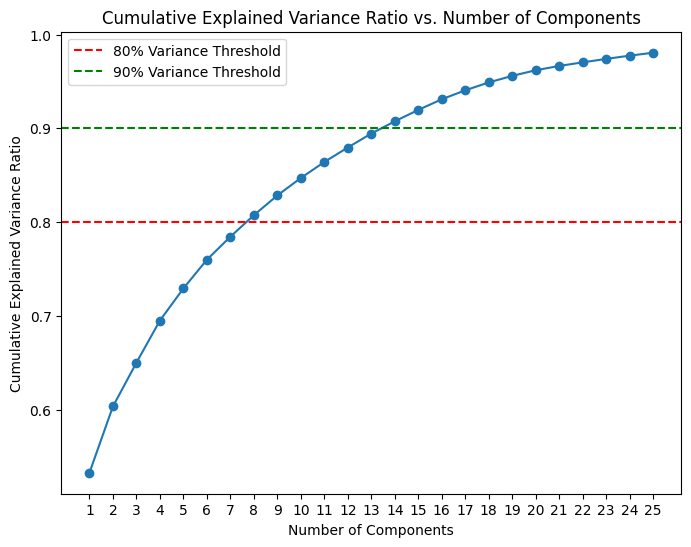

In [52]:
# Find optimal num components to use (n) by plotting explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, 26), cum_evr[1:26], marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')

# Add a horizontal line for 80% variance threshold
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Variance Threshold')
plt.axhline(y=0.9, color='g', linestyle='--', label='90% Variance Threshold')
plt.xticks(np.arange(1, 26, 1))

# Show legend
plt.legend()

plt.show()

### Conclusion: the ideal number of components = 14

#### 2.1.2.3 Final PCA and Re-Doing Regressions

#####2.1.2.3.1 Fit and Transform using Number of Components obtained in the previous step

In [53]:
# 1. Re-fit and transform on training with parameter n (as deduced from the last step)

pca = PCA(n_components=14)
X_train_2 = pca.fit_transform(X_train)

# 2. Transform on Testing Set and store it as `X_test_pca`
X_test_pca = pca.transform(X_test)

#####2.1.2.3.2 Apply linear regression to re-examine the accuracy

In [54]:
from sklearn.linear_model import LinearRegression
lin_reg_pca = LinearRegression()
lin_reg_pca.fit(X_train_2,y_train)
y_pred = lin_reg_pca.predict(X_test_pca)

In [55]:
lin_reg_pca_score = sklearn.metrics.r2_score(y_test, y_pred)

In [56]:
lin_reg_pca_score

0.8153496213269134

#####2.1.2.3.3 Apply Ridge regression to re-examine the accuracy

In [57]:
from sklearn.linear_model import Ridge

# Initialize model with alpha = 10 (keep other hyperparameters as default values) and fit it on the training set
reg_ridge_pca = Ridge(alpha=10)
reg_ridge_pca.fit(X_train_2, y_train)

# Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg_ridge_pca.predict(X_test_pca)

# Find the R-squared score and store the value in `ridge_score`
ridge_pca_score = sklearn.metrics.r2_score(y_test, y_pred)

In [58]:
ridge_pca_score

0.8153433953590474

#####2.1.2.3.4 Apply Lasso regression to re-test the accuracy

In [59]:
from sklearn.linear_model import Lasso

# Initialize model with alpha = 5 (keep other hyperparameters as default values) and fit it on the training set
reg_lasso_pca = Lasso(alpha=5)
reg_lasso_pca.fit(X_train_2, y_train)

# Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg_lasso_pca.predict(X_test_pca)

# Find the R-squared score and store the value in `ridge_score`
lasso_pca_score = sklearn.metrics.r2_score(y_test, y_pred)

In [60]:
lasso_pca_score

0.721048021158836

#####2.1.2.3.5 Random Forest, likewise

In [61]:
from sklearn.ensemble import RandomForestRegressor

# TO-DO: Initialize model with default parameters and fit it on the training set
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train_2, y_train)

# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg_rf.predict(X_test_pca)

# TO-DO: Find the R-squared score and store the value in `rfr_score`
rfr_score = sklearn.metrics.r2_score(y_test, y_pred)

In [62]:
rfr_score

0.9499853570895384

### 2.1.3 Drawing Conclusions from Models (Life Expectancy)

In [63]:
from IPython.display import Image
Image(url='https://miro.medium.com/v2/resize:fit:1000/format:webp/1*X_7MgfK-hTppBPvGkm2d1Q.png')

#### 2.1.3.1 Linear Regression Feature Analysis by Examining Coefficients (Before PCA)

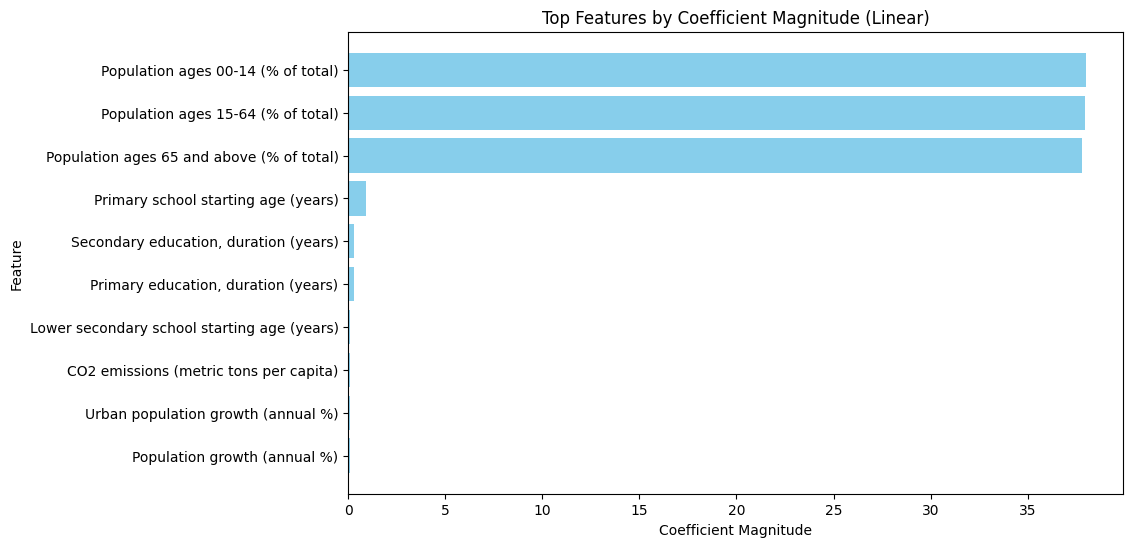

In [64]:
# Extract feature coefficients
feature_coeffs_lin = pd.Series(lin_reg.coef_, index=features.columns)

# Sort features by coefficient magnitude
sorted_features_lin = feature_coeffs_lin.abs().sort_values(ascending=False)

# Plot top features
top_features_lin = sorted_features_lin.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_features_lin.index, top_features_lin.values, color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Top Features by Coefficient Magnitude (Linear)')
plt.gca().invert_yaxis()  # Invert y-axis to display features with the highest coefficient at the top
plt.show()

#### 2.1.3.2 Ridge Regression Feature Analysis by Examining Coefficients (Before PCA)

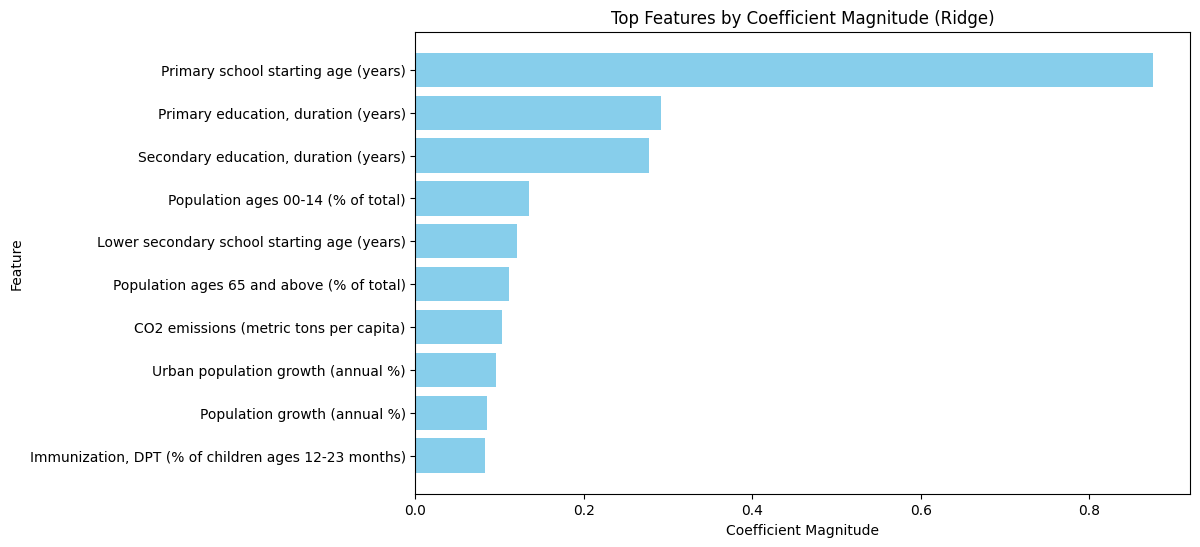

In [65]:
# Extract feature coefficients
feature_coeffs_ridge = pd.Series(reg_ridge.coef_, index=features.columns)

# Sort features by coefficient magnitude
sorted_features_ridge = feature_coeffs_ridge.abs().sort_values(ascending=False)

# Plot top features
top_features_ridge = sorted_features_ridge.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_features_ridge.index, top_features_ridge.values, color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Top Features by Coefficient Magnitude (Ridge)')
plt.gca().invert_yaxis()  # Invert y-axis to display features with the highest coefficient at the top
plt.show()

#### 2.1.3.3 LASSO Regression Feature Analysis by Examining Coefficients (Before PCA)

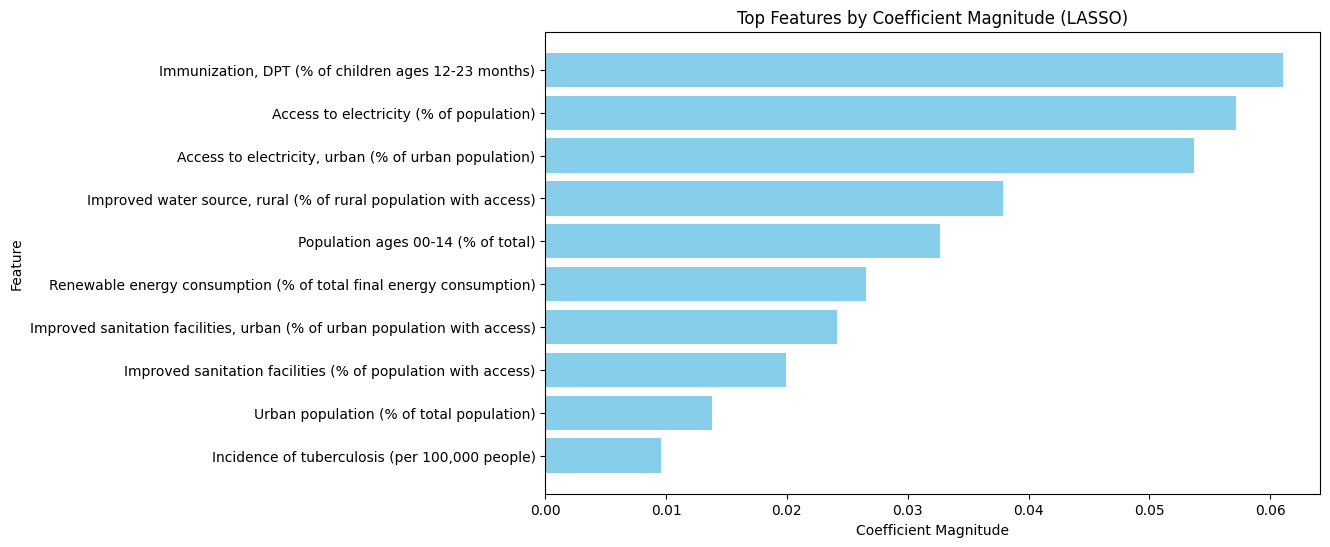

In [66]:
# Extract feature coefficients
feature_coeffs_lasso = pd.Series(reg_lasso.coef_, index=features.columns)

# Sort features by coefficient magnitude
sorted_features_lasso = feature_coeffs_lasso.abs().sort_values(ascending=False)

# Plot top features
top_features_lasso = sorted_features_lasso.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_features_lasso.index, top_features_lasso.values, color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Top Features by Coefficient Magnitude (LASSO)')
plt.gca().invert_yaxis()  # Invert y-axis to display features with the highest coefficient at the top
plt.show()

#### 2.1.3.1 Conclusions from Coefficeient Analysis

In our investigation of life expectancy as the dependent variable against various factors, we employed linear regression, ridge regression, and LASSO regression. Each regression technique provided insights into the relationships between life expectancy and the independent variables considered.

- **Linear Regression:**

In the linear regression model, population emerged as the most significant factor influencing life expectancy. This suggests that in a simple linear relationship, higher population counts are associated with changes in life expectancy. However, it's essential to recognize that linear regression assumes a linear relationship between the dependent and independent variables, which may oversimplify the true underlying relationship.

- **Ridge Regression:**

Ridge regression, which includes a regularization term to shrink coefficients, revealed that education was heavily weighted. This indicates that, in addition to population, education levels play a significant role in determining life expectancy. The regularization term in ridge regression helps prevent overfitting by penalizing large coefficient values, providing a more balanced model.

- **LASSO Regression:**

In LASSO regression, which applies L1 regularization, immunization and infrastructure factors such as access to electricity, clean water, and sanitation emerged as heavily weighted coefficients. This suggests that these infrastructure-related variables have a substantial impact on life expectancy. LASSO regression's feature selection property, which tends to shrink coefficients to zero, makes it particularly useful for identifying the most relevant predictors while effectively dealing with multicollinearity.

- **Conclusion:**

Our analysis using linear regression, ridge regression, and LASSO regression provided valuable insights into the factors influencing life expectancy. While linear regression highlighted population as the primary determinant, ridge regression emphasized the importance of education, and LASSO regression identified infrastructure-related factors and immunization as key predictors. These findings underscore the multifaceted nature of life expectancy, influenced by demographic, socioeconomic, and environmental factors. By employing different regression techniques, we gained a comprehensive understanding of the relative importance of various factors, enabling more informed decision-making and targeted interventions aimed at improving life expectancy.

## 2.2 Classification for Tuberculosis Deaths



###2.2.1 Augmenting the Dataset

Now let's augment our dataset a little bit to include some categorical features so we can perform classification. We will now consider tuberculosis death per 100,000 as our target, and augment the dataset to allow values to fall into the following bins.

* Very high: Top 10% of death rates within the dataset
* High: 75th to 90th percentile of death rates within the dataset
* Moderate: 50th to 75th percentile of death rates within the dataset
* Low: 25th to 50th percentile of death rates within the dataset
* Very low: Bottom 25% of death rates within the dataset

In [67]:
bins = [0, df_final['Tuberculosis death rate (per 100,000 people)'].quantile(0.25), df_final['Tuberculosis death rate (per 100,000 people)'].quantile(0.5),
        df_final['Tuberculosis death rate (per 100,000 people)'].quantile(0.75), df_final['Tuberculosis death rate (per 100,000 people)'].quantile(0.9),
        df_final['Tuberculosis death rate (per 100,000 people)'].max()]

# Define labels for the bins
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

# Create a new column in the DataFrame with the categorical values
df_categorical_tuberculosis = df_final.copy()
df_categorical_tuberculosis['TB_death_rate_category'] = pd.cut(df_categorical_tuberculosis['Tuberculosis death rate (per 100,000 people)'], bins=bins, labels=labels, include_lowest=True)

###2.2.2 Splitting the Dataset into Test and Training sets

In [68]:
features = df_categorical_tuberculosis.drop(columns=health_outcomes_series)
features.drop(columns=["TB_death_rate_category","Year","Country Name"],inplace=True)

label = df_categorical_tuberculosis["TB_death_rate_category"]

seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=seed)

###2.2.3 Pre-PCA Classification

####2.2.3.1 Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
import sklearn

# TO-DO: Initialize model with default parameters and fit it on the training set
clf_log = LogisticRegression()
clf_log.fit(X_train,y_train)

# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = clf_log.predict(X_test)

# TO-DO: Find the accuracy and store the value in `log_acc`
log_acc =sklearn.metrics.accuracy_score(y_pred,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
log_acc

0.3867713004484305

####2.2.3.2 Random Forest Classification

In [71]:
from sklearn.ensemble import RandomForestClassifier

# TO-DO: Initialize model with default parameters and fit it on the training set
clf_forest = RandomForestClassifier(n_estimators = 120, max_depth=30, random_state=42, class_weight="balanced")
clf_forest.fit(X_train,y_train)
# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = clf_forest.predict(X_test)

# TO-DO: Find the accuracy and store the value in `rf_acc`
rf_acc=sklearn.metrics.accuracy_score(y_pred,y_test)

# TO-DO: Compute the confusion matrix and save it to `rf_confusion`
rf_confusion = sklearn.metrics.confusion_matrix(y_test, y_pred)
rf_acc = sklearn.metrics.accuracy_score(y_test, y_pred)

In [72]:
rf_confusion

array([[126,   0,   3,   1,   0],
       [  0, 184,  14,   0,   7],
       [  8,  12, 200,   0,   0],
       [  7,   0,   0,  87,   0],
       [  0,  10,   0,   0, 233]])

In [73]:
rf_acc

0.9304932735426009

###2.2.4 PCA to reduce dimensionality

####2.2.4.1 Scaling and Initializing

In [74]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# TO-DO: Instantiate and Fit PCA
pca = PCA()
X_train_2 = pca.fit_transform(X_train)

####2.2.4.2 Cumulative Explained Variance Ratios

In [75]:
explained_variance_ratios = pca.explained_variance_ratio_
# TO-DO: Save the CUMULATIVE explained variance ratios into variable called "cum_evr"
cum_evr = pca.explained_variance_ratio_.cumsum()

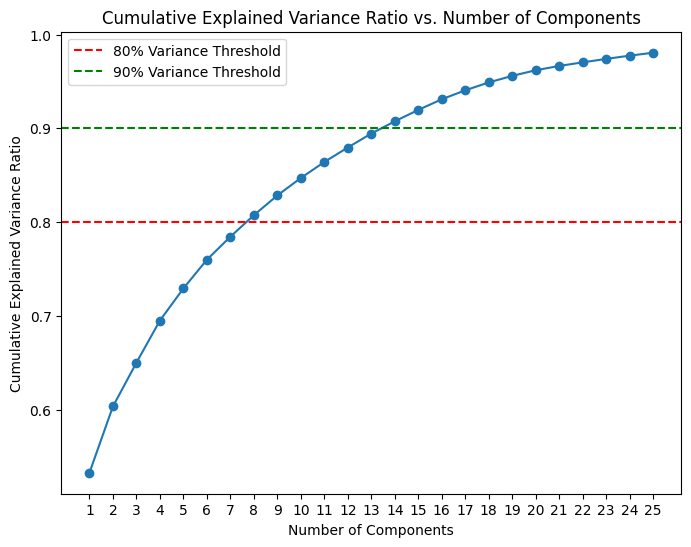

In [76]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 26), cum_evr[1:26], marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')

# Add a horizontal line for 80% variance threshold
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Variance Threshold')
plt.axhline(y=0.9, color='g', linestyle='--', label='90% Variance Threshold')
plt.xticks(np.arange(1, 26, 1))

# Show legend
plt.legend()

plt.show()

####The ideal number of components is 14, again

####2.2.4.3 Final PCA and Redoing Classification

#####2.2.4.3.1 Fit and Transform

In [77]:
pca = PCA(n_components=14)
X_train_2 = pca.fit_transform(X_train)

# 2. Transform on Testing Set and store it as `X_test_pca`
X_test_pca = pca.transform(X_test)

#####2.2.4.3.2 Logistic Regression

In [78]:
log_reg_pca = LogisticRegression(max_iter=200)
log_reg_pca.fit(X_train_2,y_train)

# Use the model to predict on the PCA transformed test set and save these predictions as `y_pred`
y_pred = log_reg_pca.predict(X_test_pca)

# Find the accuracy and store the value in `test_accuracy`
test_accuracy = sklearn.metrics.accuracy_score(y_pred,y_test)

In [79]:
test_accuracy

0.6165919282511211

#####2.2.4.3.3 Random Forest Classification

In [80]:
from sklearn.ensemble import RandomForestClassifier

# TO-DO: Initialize model with default parameters and fit it on the training set
clf = RandomForestClassifier(n_estimators = 120, max_depth=30, random_state=42, class_weight="balanced")
clf.fit(X_train_2,y_train)
# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = clf.predict(X_test_pca)

# TO-DO: Find the accuracy and store the value in `rf_acc`
rf_acc=sklearn.metrics.accuracy_score(y_pred,y_test)

# TO-DO: Compute the confusion matrix and save it to `rf_confusion`
rf_confusion = sklearn.metrics.confusion_matrix(y_test, y_pred)
rf_acc = sklearn.metrics.accuracy_score(y_test, y_pred)

In [81]:
rf_confusion

array([[117,   0,   9,   4,   0],
       [  0, 184,  13,   0,   8],
       [  8,  10, 200,   0,   2],
       [ 12,   0,   1,  81,   0],
       [  0,  14,   1,   0, 228]])

In [82]:
rf_acc

0.9080717488789237

### 2.2.5 Drawing Conclusions from Models (Tuberculosis)

#### 2.2.5.1 Logistic Regression Feature Analysis by Examining Coefficients (Before PCA)

<ipython-input-83-94c861958bd5>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette='viridis')


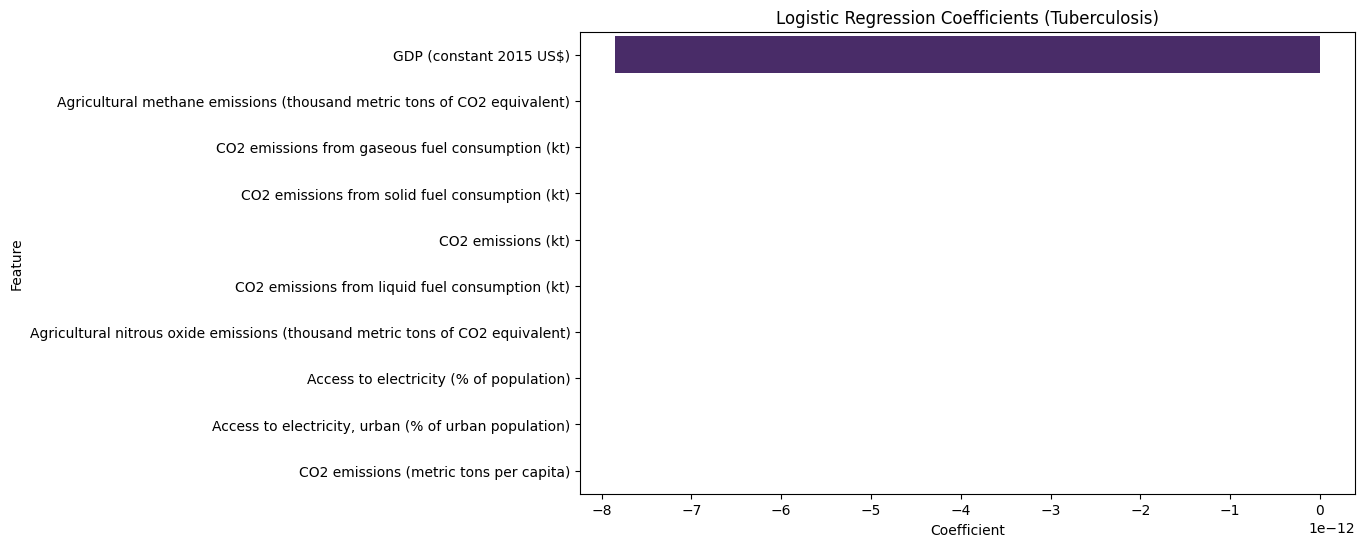

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming model is your logistic regression model and features is a list of feature names
coefficients = clf_log.coef_[0][0:10]
feature_names = features.columns
top_feature_names = feature_names[0:10]

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': top_feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value
coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Create coefficient plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette='viridis')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients (Tuberculosis)')
plt.show()

#### 2.2.5.2 Random Forest Feature Analysis by Examining Feature Importance (Before PCA)

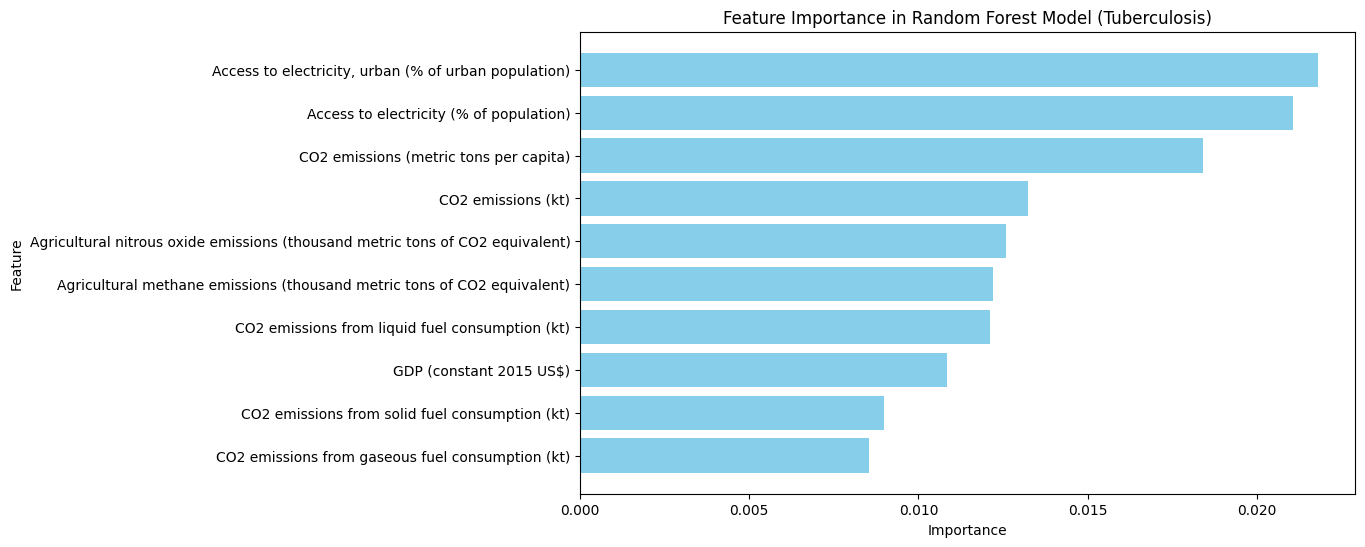

In [84]:
feature_names = features.columns
feature_names = feature_names[0:10]
feature_importance = clf_forest.feature_importances_
feature_importance = feature_importance[0:10]

# Create DataFrame to store feature importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance score
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model (Tuberculosis)')
plt.show()

#### 2.2.5.3 Conclusions from Feature Analysis

In our investigation of tuberculosis death rates against various factors, we employed logistic regression and random forest regression models to understand the relationship between the dependent variable and the independent variables. We then analyzed the results to identify feature importance and assess the predictive performance of each model.

- **Logistic Regression:**

In the logistic regression model, CO2 levels emerged as a significant predictor of tuberculosis death rates. This suggests that higher CO2 levels may be associated with increased tuberculosis mortality. However, it's important to note that despite CO2 levels showing a strong relationship with the dependent variable, the logistic regression model had a low accuracy score. This indicates that the model may not effectively capture the underlying complexities of the relationship between the independent variables and tuberculosis death rates.

- **Random Forest:**

In the random forest model, CO2 levels and access to electricity were identified as the most important features when assessing feature importance. This suggests that both CO2 levels and access to electricity play crucial roles in predicting tuberculosis death rates. Unlike logistic regression, the random forest model demonstrated better accuracy, indicating its effectiveness in capturing the complex relationships between the independent variables and tuberculosis mortality.

- **Conclusion:**

Our analysis indicates that both CO2 levels and access to electricity are key factors to consider when predicting tuberculosis death rates. While logistic regression highlighted the importance of CO2 levels, the random forest model identified both CO2 levels and access to electricity as significant predictors. Importantly, the random forest model outperformed logistic regression in terms of accuracy, suggesting its utility in predicting tuberculosis mortality.

- **Analysis**

Access to electricity and CO2 levels can impact tuberculosis rates through various interconnected pathways. Limited access to electricity often correlates with socioeconomic disparities, inadequate healthcare infrastructure, and reliance on polluting indoor cooking methods, leading to increased indoor air pollution and respiratory health risks. Elevated CO2 levels, indicative of environmental pollution, can further exacerbate respiratory health problems and weaken immune function, increasing susceptibility to tuberculosis infection. Addressing these underlying factors, including improving access to clean energy sources, reducing environmental pollution, and addressing socioeconomic inequalities, is crucial for mitigating tuberculosis rates and improving overall respiratory health outcomes globally.

## 2.3 Regression for Fertility Rates

####Lets try with a different target feature now: Fertility Rate, Total (births per woman)


###2.3.1 Split data into training, test sets

In [85]:
features = df_final.drop(columns=health_outcomes_series)
features.drop(columns="Year", inplace=True)
features.drop(columns="Country Name", inplace=True)

target_fertility = df_final["Fertility rate, total (births per woman)"]
seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target_fertility, test_size=0.2, random_state=seed)

###2.3.2 Pre-PCA Regression

####2.3.2.1 Linear

In [86]:
from sklearn.linear_model import LinearRegression
lin_reg_pre = LinearRegression()
lin_reg_pre.fit(X_train,y_train)
y_pred = lin_reg_pre.predict(X_test)

In [87]:
lin_reg_score = sklearn.metrics.r2_score(y_test, y_pred)

In [88]:
lin_reg_score

0.8881366202426377

####2.3.2.2 Lasso

In [89]:
from sklearn.linear_model import Lasso

# TO-DO: Initialize model with alpha = 10 (keep other hyperparameters as default values) and fit it on the training set
reg_lasso_pre = Lasso(alpha=5)
reg_lasso_pre.fit(X_train, y_train)

# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg_lasso_pre.predict(X_test)

# TO-DO: Find the R-squared score and store the value in `ridge_score`
lasso_score = sklearn.metrics.r2_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.056e+03, tolerance: 9.217e-01
  model = cd_fast.enet_coordinate_descent(


In [90]:
lasso_score

0.6957584552689813

#### 2.3.2.3 Ridge

In [91]:
from sklearn.linear_model import Ridge

# TO-DO: Initialize model with alpha = 10 (keep other hyperparameters as default values) and fit it on the training set
reg_ridge_pre = Ridge(alpha=5)
reg_ridge_pre.fit(X_train, y_train)

# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg_ridge_pre.predict(X_test)

# TO-DO: Find the R-squared score and store the value in `ridge_score`
ridge_score = sklearn.metrics.r2_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.76343e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [92]:
ridge_score

0.88859394338715

####2.3.2.4 Random Forest

In [93]:
from sklearn.ensemble import RandomForestRegressor

# TO-DO: Initialize model with default parameters and fit it on the training set
reg_rf_pre = RandomForestRegressor()
reg_rf_pre.fit(X_train, y_train)

# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg_rf_pre.predict(X_test)

# TO-DO: Find the R-squared score and store the value in `rfr_score`
rfr_score = sklearn.metrics.r2_score(y_test, y_pred)

In [94]:
rfr_score

0.9879165571438916

### 2.3.3 PCA to reduce dimensionality

We can see that there are many features that are essentially the same data points which is making it difficult to examine other correlations. Let's use PCA to reduce the number of features.

#### 2.3.3.1 Scaling and Initializing

In [95]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Intermediate step to address fac that PCA is not scale-invariant
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate and Fit PCA
pca = PCA()
X_train_2 = pca.fit_transform(X_train)

####2.3.3.2 Cumulative Explained Variance Ratios

####**Cumulative Explained Variance Ratios**

Here, we create an array of explained variance ratios and store it into a variable called `explained_variance_ratios`. Also, we calculate the _cumulative_ explained variance ratios and store that into another variable called `cum_evr`.

In [96]:
explained_variance_ratios = pca.explained_variance_ratio_
# Save the CUMULATIVE explained variance ratios into variable called "cum_evr"
cum_evr = pca.explained_variance_ratio_.cumsum()

Now plot the _cumulative_ `explained_variance_ratio` against the number of components to decide the number of components you should keep (this should look very similar to a visualization in lecture). Also add a horizontal line that represents the 80% of the variance as a threshold.

As before, you should ensure that the plot follows the best practices you've developed over the past 2 plotting exercises in this HW (Labelling the axes and adding title to the plot, readability, etc.). **This will be manually graded for 2 points**

_**CAUTION:** Recall that Python starts counting from 0, but this would make it very intuitive when reading from your graph. We strongly recommend that you modify the x-axis of your graph so that the **number of components begins at 1**. Otherwise, you may risk making silly mistakes in the subsequent sections._

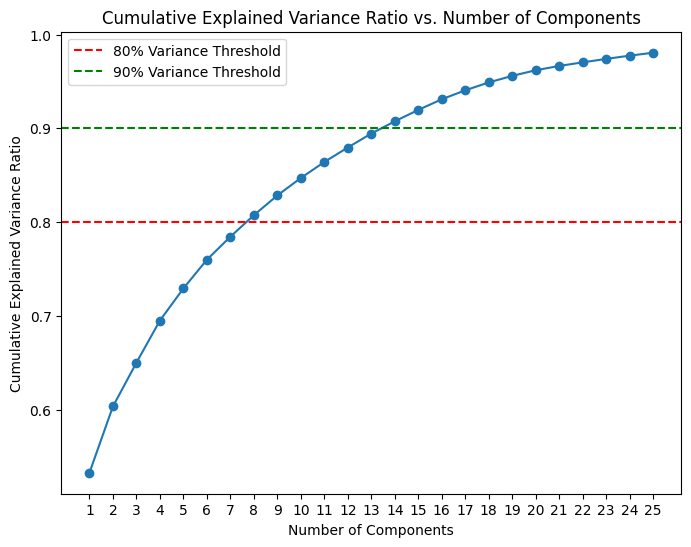

In [97]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 26), cum_evr[1:26], marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')

# Add a horizontal line for 80% variance threshold
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Variance Threshold')
plt.axhline(y=0.9, color='g', linestyle='--', label='90% Variance Threshold')
plt.xticks(np.arange(1, 26, 1))

# Show legend
plt.legend()
plt.show()

####2.3.3.3 Final PCA and Regression



In [98]:
Image(url='https://i.imgflip.com/wrf9r.jpg?a475872', width=300)

#####2.3.3.3.1 Fit and Transform

In [99]:
# 1. Refit and transform on training with parameter n (as deduced from the last step)

pca = PCA(n_components=8)
X_train_2 = pca.fit_transform(X_train)

# 2. Transform on Testing Set and store it as `X_test_pca`
X_test_pca = pca.transform(X_test)

#####2.3.3.3.2 Linear


In [100]:
from sklearn.linear_model import LinearRegression
lin_reg_pca = LinearRegression()
lin_reg_pca.fit(X_train_2,y_train)
y_pred = lin_reg_pca.predict(X_test_pca)

In [101]:
lin_reg_score = sklearn.metrics.r2_score(y_test, y_pred)

In [102]:
lin_reg_score

0.816440260668341

#####2.3.3.3.3 Linear

In [103]:
from sklearn.linear_model import Ridge

# TO-DO: Initialize model with alpha = 10 (keep other hyperparameters as default values) and fit it on the training set
reg_ridge = Ridge(alpha=10)
reg_ridge.fit(X_train_2, y_train)

# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg_ridge.predict(X_test_pca)

# TO-DO: Find the R-squared score and store the value in `ridge_score`
ridge_score = sklearn.metrics.r2_score(y_test, y_pred)

In [104]:
ridge_score

0.8164087934425034

#####2.3.3.3.4 Lasso

In [105]:
from sklearn.linear_model import Lasso

# TO-DO: Initialize model with alpha = 10 (keep other hyperparameters as default values) and fit it on the training set
reg_lasso = Lasso(alpha=10)
reg_lasso.fit(X_train_2, y_train)

# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg_lasso.predict(X_test_pca)

# TO-DO: Find the R-squared score and store the value in `ridge_score`
lasso_score = sklearn.metrics.r2_score(y_test, y_pred)

In [106]:
lasso_score

-1.1096817932099157e-05

#####2.3.3.3.5 Random Forest

In [107]:
from sklearn.ensemble import RandomForestRegressor

# TO-DO: Initialize model with default parameters and fit it on the training set
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train_2, y_train)

# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg_rf.predict(X_test_pca)

# TO-DO: Find the R-squared score and store the value in `rfr_score`
rfr_score = sklearn.metrics.r2_score(y_test, y_pred)

In [108]:
rfr_score

0.9493410218062077

### 2.3.4 Drawing Conclusions from Models (Fertility Rates)

#### 2.3.4.1 Linear Regression Feature Analysis by Examining Coefficients (Before PCA)

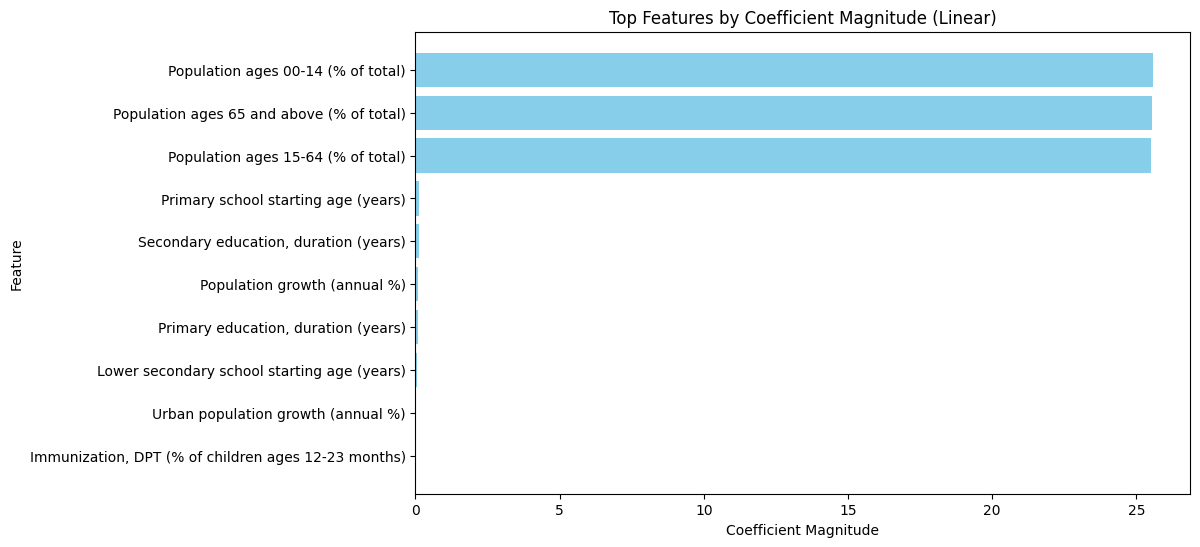

In [109]:
# Extract feature coefficients
feature_coeffs_lin = pd.Series(lin_reg_pre.coef_, index=features.columns)

# Sort features by coefficient magnitude
sorted_features_lin = feature_coeffs_lin.abs().sort_values(ascending=False)

# Plot top features
top_features_lin = sorted_features_lin.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_features_lin.index, top_features_lin.values, color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Top Features by Coefficient Magnitude (Linear)')
plt.gca().invert_yaxis()  # Invert y-axis to display features with the highest coefficient at the top
plt.show()

#### 2.3.4.2 LASSO Regression Feature Analysis by Examining Coefficients (Before PCA)

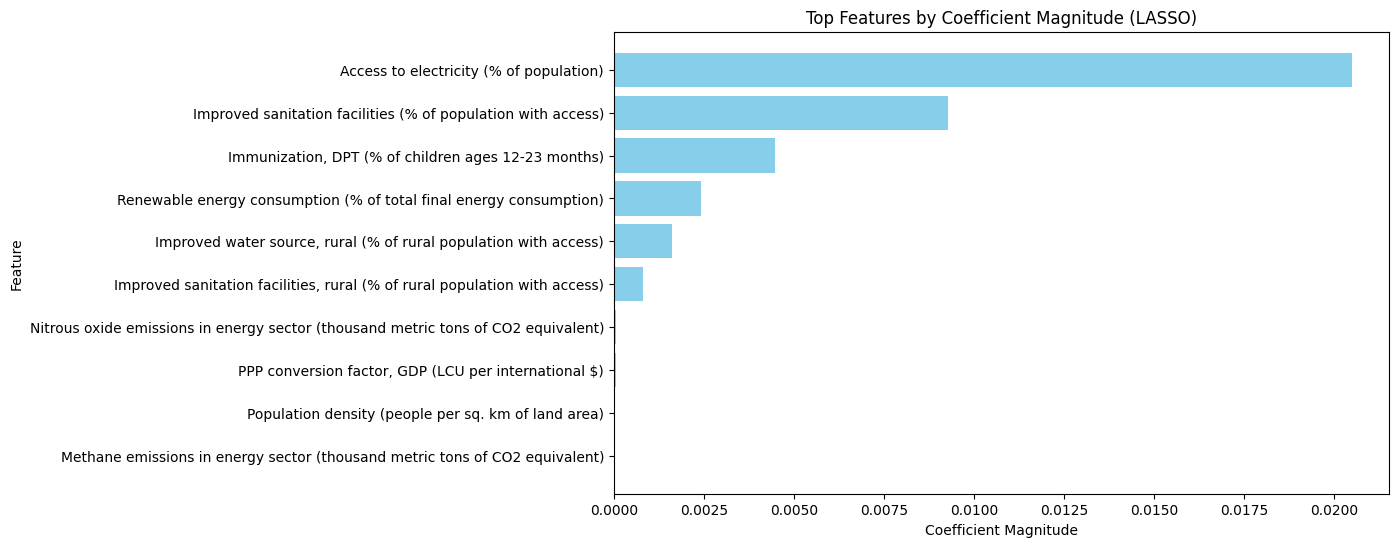

In [110]:
# Extract feature coefficients
feature_coeffs_lasso = pd.Series(reg_lasso_pre.coef_, index=features.columns)

# Sort features by coefficient magnitude
sorted_features_lasso = feature_coeffs_lasso.abs().sort_values(ascending=False)

# Plot top features
top_features_lasso = sorted_features_lasso.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_features_lasso.index, top_features_lasso.values, color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Top Features by Coefficient Magnitude (LASSO)')
plt.gca().invert_yaxis()  # Invert y-axis to display features with the highest coefficient at the top
plt.show()

#### 2.3.4.3 Ridge Regression Feature Analysis by Examining Coefficients (Before PCA)

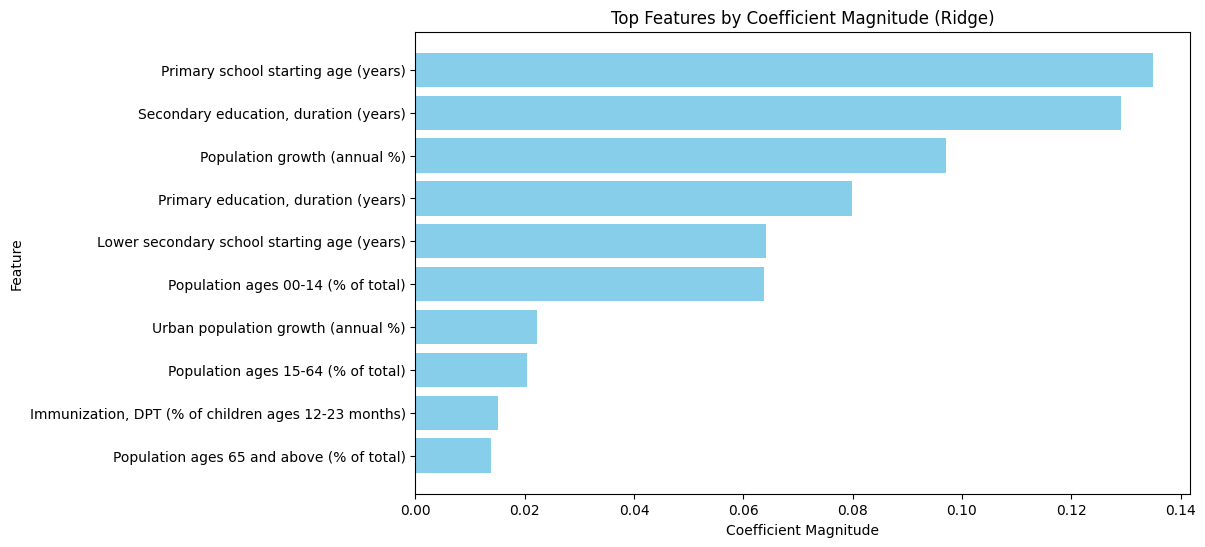

In [111]:
# Extract feature coefficients
feature_coeffs_ridge = pd.Series(reg_ridge_pre.coef_, index=features.columns)

# Sort features by coefficient magnitude
sorted_features_ridge = feature_coeffs_ridge.abs().sort_values(ascending=False)

# Plot top features
top_features_ridge = sorted_features_ridge.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_features_ridge.index, top_features_ridge.values, color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Top Features by Coefficient Magnitude (Ridge)')
plt.gca().invert_yaxis()  # Invert y-axis to display features with the highest coefficient at the top
plt.show()

#### 2.2.5.3 Random Forest Feature Analysis by Examining Feature Importance (Before PCA)

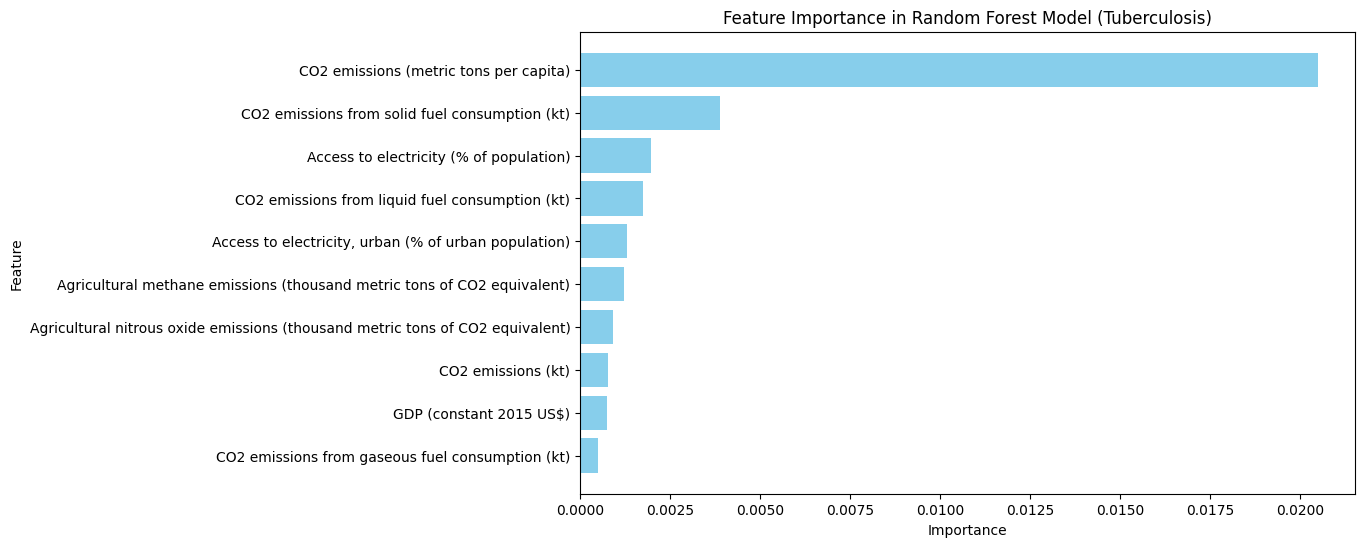

In [112]:
feature_names = features.columns
feature_names = feature_names[0:10]

feature_importance = reg_rf_pre.feature_importances_
feature_importance = feature_importance[0:10]

# Create DataFrame to store feature importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance score
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model (Tuberculosis)')
plt.show()

## **3.0 Project Conclusion Wrap-up**
- #### **Economic Factors: Influence on Health Outcomes**
Our analysis indicates a significant correlation between economic factors and global health outcomes. Variables such as GDP per capita, unemployment rates, and economic growth directly impact health metrics across different regions. This suggests that stronger economic conditions may lead to better health outcomes due to improved healthcare funding and access to essential services.
- #### **Impact of ESG Factors**
Environmental, Social, and Governance (ESG) factors also play a crucial role in influencing health outcomes. Specifically, environmental factors like air quality and access to clean water are strongly correlated with health metrics such as life expectancy and disease prevalence. This highlights the importance of sustainable practices and policies to enhance public health.
- #### **Role of Technological Advancements**
Our project findings underscore the positive impact of technological advancements in healthcare, such as increased availability of medical technology and improved healthcare data management, on health outcomes. These advancements contribute to more effective disease management and treatment options, leading to better overall health metrics.
- #### **Interconnectivity of Factors**
Our project demonstrates the interconnectivity of various economic, environmental, and technological factors in shaping global health outcomes. It is evident that no single factor works in isolation but rather in conjunction with others to influence public health, necessitating a multidimensional approach to health improvement strategies.
- #### **Potential Future Policy Implications**
The insights from this project can inform policy decisions and public health strategies. By understanding the specific variables that significantly impact health outcomes, policymakers can tailor interventions and allocate resources more effectively to areas that will yield the most substantial improvements in public health.

## **3.1 Project Progress & Bottomlines**

In [114]:
#img = plt.imread('Progress.png')
#plt.axis("off")
#plt.imshow(img)
#plt.show()

In [118]:
#img = plt.imread('End Quotes.png')
#plt.axis("off")
#plt.imshow(img)
#plt.show()

In [119]:
Image(url='https://i.imgflip.com/5mqq1v.jpg', width=450)

In [120]:
Image(url='https://media.makeameme.org/created/when-summer-break-2de4ff69c5.jpg', width=600)